In [12]:

from numpy import mean
from numpy import std
from sklearn.datasets import make_classification
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.linear_model import LogisticRegression
import bisect
from tqdm import tqdm
import pandas as pd
import numpy as np
from ast import literal_eval
import scipy.spatial as spatial


In [ ]:
dat_land = pd.read_csv('C:/Users/vjosv/master/dataset/images/csv/combined_lokasjon_top_100_images200_seed1117_attempt2_landscape.csv')

In [ ]:
dat_kde = pd.read_csv('C:/Users/vjosv/master/dataset/images/csv/combined_lokasjon_top_100_images200_seed1117_kde_attemp2.csv')

dat_kde

In [ ]:
dat = dat_land.merge(dat_kde[['image_id','kde4000_1000bw', 'kde6000_3000bw',
       'kde4000_2000bw', 'kde4000_3000bw', 'kde2000_1000bw']], how='left', on='image_id')
# def get_rectangle(point, total_squares):


In [2]:
# dat.to_csv('C:/Users/vjosv/master/dataset/images/csv/combined_lokasjon_top_100_images200_seed1117_attempt2_landscape_kde.csv')

# dat = pd.read_csv('C:/Users/vjosv/master/dataset/images/csv/combined_lokasjon_top_100_images200_seed1117_attempt2_landscape_kde.csv')
dat = pd.read_csv('C:/Users/vjosv/master/dataset/images/csv/combined_lokasjon_top_100_images20_see1212_validation.csv')

dat.columns

Index(['Unnamed: 0.2', 'Id', 'Taksonsorteringsrekkefølge', 'Valideringsstatus',
       'Rødlistekategori', 'Artsnavn', 'Vitenskapelig navn', 'Autor', 'Antall',
       'Enhet', 'Alder', 'Kjønn', 'Aktivitet', 'Metode', 'Superlokalitet',
       'Lokalitetsnavn', 'Østkoordinat', 'Nordkoordinat', 'Nøyaktighet',
       'Originale koordinater', 'Fylke', 'Kommune', 'Fylke.1', 'IKKE I NORGE',
       'Ekstern id', 'Startdato', 'Stattidspunkt', 'Sluttdato',
       'Sluttidspunkt', 'Kommentar', 'Ikke gjenfunnet',
       'Usikker artsbestemmelse', 'Uspontan', 'Natursystem',
       'Natursystem beskrivelse', 'Livsmedium', 'Vitenskapelig livsmediumnavn',
       'Art som livsmedium, beskrivelse', 'Livsmedium.1',
       'Livsmediumbeskrivelse', 'Min. dybde', 'Maks. dybde', 'Høyde min',
       'Høyde maks', 'Offentlig samling', 'Privat samling', 'Bekreftelsesdato',
       'Redigeringsansvarlig', 'Rapportør', 'Observatører', 'image_id',
       'science_name', 'path', 'target', 'points', 'squares_8', 'squ

In [27]:
max_n = dat_loc['Nordkoordinat'].max()

min_n = dat_loc['Nordkoordinat'].min()

max_e = dat_loc['Østkoordinat'].max()

min_e = dat_loc['Østkoordinat'].min()

print(max_n,min_n)
print(max_e,min_e)

max_n = dat['Nordkoordinat'].max()

min_n = dat['Nordkoordinat'].min()

max_e = dat['Østkoordinat'].max()

min_e = dat['Østkoordinat'].min()

print(max_n,min_n)
print(max_e,min_e)

7939440 6448621
1108075 -75864
8731926 6454573
1097243 -74430


In [ ]:
l = dat['points'].to_list()
l[0]
total_squares = 20
E = np.linspace(min_e-1, max_e, num=total_squares, endpoint=True)

N_step = round(E[1]-E[0])
N_step

np.arange(min_n-1,max_n+N_step, N_step)


In [5]:
max_n = 8767538 
min_n = 6448621
max_e = 1108075  
min_e = -75864
total_squares_east = 8 
E = np.linspace(min_e-1, max_e, num=total_squares_east, endpoint=True)
print(((E[2]-E[1])/1000)*((E[2]-E[1])/1000))
total_squares_east = 10 
E = np.linspace(min_e-1, max_e, num=total_squares_east, endpoint=True)
print(((E[2]-E[1])/1000)*((E[2]-E[1])/1000))
total_squares_east = 15 
E = np.linspace(min_e-1, max_e, num=total_squares_east, endpoint=True)
print(((E[2]-E[1])/1000)*((E[2]-E[1])/1000))
total_squares_east = 20 
E = np.linspace(min_e-1, max_e, num=total_squares_east, endpoint=True)
print(((E[2]-E[1])/1000)*((E[2]-E[1])/1000))
total_squares_east = 30 
E = np.linspace(min_e-1, max_e, num=total_squares_east, endpoint=True)
print(((E[2]-E[1])/1000)*((E[2]-E[1])/1000))
total_squares_east = 40 
E = np.linspace(min_e-1, max_e, num=total_squares_east, endpoint=True)
print(((E[2]-E[1])/1000)*((E[2]-E[1])/1000))
total_squares_east = 50 
E = np.linspace(min_e-1, max_e, num=total_squares_east, endpoint=True)
print(((E[2]-E[1])/1000)*((E[2]-E[1])/1000))
total_squares_east = 50 
E = np.linspace(min_e-1, max_e, num=total_squares_east, endpoint=True)
print(((E[2]-E[1])/1000)*((E[2]-E[1])/1000))

28606.406604081632
17305.11016790123
7151.601651020408
3882.8640542936287
1666.7228580261592
921.5739142669297
583.8042164098292
583.8042164098292


In [6]:
max_n = 8767538 
min_n = 6448621
max_e = 1108075  
min_e = -75864


def get_rectangle(point, total_squares=20):
    N = np.linspace(min_n-1, max_n, num=total_squares, endpoint=True)
    E = np.linspace(min_e-1, max_e, num=total_squares, endpoint=True)
    square_n = bisect.bisect_left(N, point[1])
    square_e = bisect.bisect_left(E, point[0])
    return [square_n,square_e]

def get_squares(point, total_squares_east=20):
    E = np.linspace(min_e-1, max_e, num=total_squares_east, endpoint=True)
    N_step = round(E[1]-E[0])
    N = np.arange(min_n-1,max_n+N_step, N_step)
    square_n = bisect.bisect_left(N, point[1])
    square_e = bisect.bisect_left(E, point[0])
    return [square_n,square_e]



# dat = pd.read_csv('C:/Users/vjosv/master/dataset/images/csv/combined_lokasjon_top_100_images200_seed1117_attempt2_landscape_kde_train.csv')


In [7]:
dat['points'] = [[p[0],p[1]] for p in zip(dat['Østkoordinat'].to_list(),dat['Nordkoordinat'].to_list())]

In [8]:
dat['squares_8'] = [get_squares(p,8) for p in dat['points'].to_list()]
dat['squares_20'] = [get_squares(p,20) for p in dat['points'].to_list()]
dat['squares_15'] = [get_squares(p,15) for p in dat['points'].to_list()]
dat['squares_10'] = [get_squares(p,10) for p in dat['points'].to_list()]
dat['squares_30'] = [get_squares(p,30) for p in dat['points'].to_list()]
dat['squares_40'] = [get_squares(p,40) for p in dat['points'].to_list()]
dat['squares_50'] = [get_squares(p,50) for p in dat['points'].to_list()]
dat['squares_60'] = [get_squares(p,60) for p in dat['points'].to_list()]
dat['squares_70'] = [get_squares(p,70) for p in dat['points'].to_list()]
dat['squares_80'] = [get_squares(p,80) for p in dat['points'].to_list()]
dat['squares_90'] = [get_squares(p,90) for p in dat['points'].to_list()]
dat['squares_100'] = [get_squares(p,100) for p in dat['points'].to_list()]
dat['squares_150'] = [get_squares(p,100) for p in dat['points'].to_list()]
dat['squares_200'] = [get_squares(p,100) for p in dat['points'].to_list()]

In [9]:
dat['square_20x20'] = [get_rectangle(p) for p in dat['points'].to_list()]
dat['square_15x15'] = [get_rectangle(p,15) for p in dat['points'].to_list()]
dat['square_10x10'] = [get_rectangle(p,10) for p in dat['points'].to_list()]
dat['square_30x30'] = [get_rectangle(p,30) for p in dat['points'].to_list()]
dat['square_40x40'] = [get_rectangle(p,40) for p in dat['points'].to_list()]
dat['square_50x50'] = [get_rectangle(p,50) for p in dat['points'].to_list()]
dat['square_60x60'] = [get_rectangle(p,60) for p in dat['points'].to_list()]
dat['square_70x70'] = [get_rectangle(p,70) for p in dat['points'].to_list()]
dat['square_80x80'] = [get_rectangle(p,80) for p in dat['points'].to_list()]
dat['square_90x90'] = [get_rectangle(p,90) for p in dat['points'].to_list()]
dat['square_100x100'] = [get_rectangle(p,100) for p in dat['points'].to_list()]

In [10]:
dat['square_150x150'] = [get_rectangle(p,100) for p in dat['points'].to_list()]
dat['square_200x200'] = [get_rectangle(p,100) for p in dat['points'].to_list()]

In [11]:
import pandas as pd



In [12]:


dat[dat['image_id']==2263128 ].index


Index([], dtype='int64')

In [13]:
# a = [5629, 5630, 5631, 5632, 5633, 5634, 5635, 5636, 6967, 6968, 6969, 6970, 6971, 6972, 6973, 6974]
# dat = dat.drop(a[1:])

# dat.to_csv('C:/Users/vjosv/master/dataset/images/csv/combined_lokasjon_top_100_images200_seed1117_attempt2_landscape_kde.csv')
# dat = pd.read_csv('C:/Users/vjosv/master/dataset/images/csv/combined_lokasjon_top_100_images200_seed1117_attempt2_landscape_kde.csv')

# dat.to_csv('C:/Users/vjosv/master/dataset/images/csv/combined_lokasjon_top_100_images20_see1207_validation.csv')


# dat.to_csv('C:/Users/vjosv/master/dataset/images/csv/combined_lokasjon_top_100_images200_seed1117_attempt2_landscape_kde_test.csv')


# dat.to_csv('C:/Users/vjosv/master/dataset/images/csv/combined_lokasjon_top_100_images200_seed1117_attempt2_landscape_kde_train.csv')

dat
# dat.to_csv('C:/Users/vjosv/master/dataset/images/csv/combined_lokasjon_top_100_images200_seed1117_attempt2_landscape_kde.csv')

,Unnamed: 0.2,Unnamed: 0.1,Unnamed: 0,Id,Taksonsorteringsrekkefølge,Valideringsstatus,Rødlistekategori,Artsnavn,Vitenskapelig navn,Autor,...,square_30x30,square_40x40,square_50x50,square_60x60,square_70x70,square_80x80,square_90x90,square_100x100,square_150x150,square_200x200
0,34,34,57,33385569,511000,Ikke validert (funnet er ikke kvalitetssikret),NaN,landøyde,Jacobaea vulgaris,Gaertn.,...,"[3, 9]","[4, 11]","[4, 14]","[5, 17]","[6, 20]","[7, 22]","[8, 25]","[8, 28]","[8, 28]","[8, 28]"
1,45,45,84,33378441,5690000,Ikke validert (funnet er ikke kvalitetssikret),NaN,furu,Pinus sylvestris,L.,...,"[5, 11]","[7, 14]","[8, 18]","[10, 21]","[12, 24]","[13, 28]","[15, 31]","[16, 35]","[16, 35]","[16, 35]"
2,75,75,186,33362995,1699000,Ikke validert (funnet er ikke kvalitetssikret),SE,parkslirekne,Reynoutria japonica,Houtt.,...,"[4, 2]","[5, 2]","[7, 2]","[8, 3]","[9, 3]","[10, 3]","[12, 4]","[13, 4]","[13, 4]","[13, 4]"
3,88,88,212,33359035,4666000,Ikke validert (funnet er ikke kvalitetssikret),NaN,blekmarihand,Dactylorhiza maculata,(L.) Soó,...,"[18, 20]","[23, 27]","[29, 34]","[35, 41]","[41, 48]","[47, 55]","[53, 62]","[59, 69]","[59, 69]","[59, 69]"
4,105,105,249,33351321,1922000,Ikke validert (funnet er ikke kvalitetssikret),SE,kjempespringfrø,Impatiens glandulifera,Royle,...,"[3, 7]","[4, 10]","[4, 12]","[5, 14]","[6, 16]","[7, 19]","[7, 21]","[8, 23]","[8, 23]","[8, 23]"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4838,33939,55443,183413,17512970,4227000,Ikke validert (funnet er ikke kvalitetssikret),NaN,bergfrue,Saxifraga cotyledon,L.,...,"[13, 14]","[18, 19]","[22, 24]","[27, 28]","[31, 33]","[36, 38]","[40, 43]","[44, 47]","[44, 47]","[44, 47]"
4839,33943,55715,184258,17443637,4227000,Ikke validert (funnet er ikke kvalitetssikret),NaN,bergfrue,Saxifraga cotyledon,L.,...,"[13, 14]","[18, 19]","[22, 24]","[27, 28]","[31, 33]","[36, 38]","[40, 43]","[44, 47]","[44, 47]","[44, 47]"
4840,33947,55891,184955,17358518,4227000,Ikke validert (funnet er ikke kvalitetssikret),NaN,bergfrue,Saxifraga cotyledon,L.,...,"[4, 3]","[5, 3]","[6, 4]","[8, 5]","[9, 5]","[10, 6]","[11, 7]","[12, 7]","[12, 7]","[12, 7]"
4841,33953,56867,188058,16829202,4227000,Ikke validert (funnet er ikke kvalitetssikret),NaN,bergfrue,Saxifraga cotyledon,L.,...,"[3, 5]","[3, 6]","[4, 8]","[5, 10]","[5, 11]","[6, 13]","[7, 14]","[8, 16]","[8, 16]","[8, 16]"


In [57]:
dat_loc = pd.read_csv('C:/Users/vjosv/master/dataset/images/csv/second_try_lokasjon_top_100_csv.csv')
dat_loc['points'] = [[p[0],p[1]] for p in zip(dat_loc['Østkoordinat'].to_list(),dat_loc['Nordkoordinat'].to_list())]

C:\Users\vjosv\AppData\Local\Temp\ipykernel_6148\1039702082.py:1: DtypeWarning: Columns (12,13,22,23,24,35,36,37,38,44) have mixed types. Specify dtype option on import or set low_memory=False.
  dat_loc = pd.read_csv('C:/Users/vjosv/master/dataset/images/csv/second_try_lokasjon_top_100_csv.csv')


In [58]:
dat_loc['points'] = [[p[0],p[1]] for p in zip(dat_loc['Østkoordinat'].to_list(),dat_loc['Nordkoordinat'].to_list())]
dat_loc['square_20x20'] = [get_rectangle(p) for p in dat_loc['points'].to_list()]
dat_loc['square_15x15'] = [get_rectangle(p,15) for p in dat_loc['points'].to_list()]
dat_loc['square_10x10'] = [get_rectangle(p,10) for p in dat_loc['points'].to_list()]
dat_loc['square_30x30'] = [get_rectangle(p,30) for p in dat_loc['points'].to_list()]
dat_loc['square_40x40'] = [get_rectangle(p,40) for p in dat_loc['points'].to_list()]
dat_loc['square_50x50'] = [get_rectangle(p,50) for p in dat_loc['points'].to_list()]
dat_loc['square_60x60'] = [get_rectangle(p,60) for p in dat_loc['points'].to_list()]
dat_loc['square_70x70'] = [get_rectangle(p,70) for p in dat_loc['points'].to_list()]
dat_loc['square_80x80'] = [get_rectangle(p,80) for p in dat_loc['points'].to_list()]
dat_loc['square_90x90'] = [get_rectangle(p,90) for p in dat_loc['points'].to_list()]
dat_loc['square_100x100'] = [get_rectangle(p,100) for p in dat_loc['points'].to_list()]

In [59]:
dat_loc['square_150x150'] = [get_rectangle(p,100) for p in dat_loc['points'].to_list()]
dat_loc['square_200x200'] = [get_rectangle(p,100) for p in dat_loc['points'].to_list()]

In [60]:
dat_loc['squares_8'] = [get_squares(p,8) for p in dat_loc['points'].to_list()]
dat_loc['squares_20'] = [get_squares(p,20) for p in dat_loc['points'].to_list()]
dat_loc['squares_15'] = [get_squares(p,15) for p in dat_loc['points'].to_list()]
dat_loc['squares_10'] = [get_squares(p,10) for p in dat_loc['points'].to_list()]
dat_loc['squares_30'] = [get_squares(p,30) for p in dat_loc['points'].to_list()]
dat_loc['squares_40'] = [get_squares(p,40) for p in dat_loc['points'].to_list()]
dat_loc['squares_50'] = [get_squares(p,50) for p in dat_loc['points'].to_list()]
dat_loc['squares_60'] = [get_squares(p,60) for p in dat_loc['points'].to_list()]
dat_loc['squares_70'] = [get_squares(p,70) for p in dat_loc['points'].to_list()]
dat_loc['squares_80'] = [get_squares(p,80) for p in dat_loc['points'].to_list()]
dat_loc['squares_90'] = [get_squares(p,90) for p in dat_loc['points'].to_list()]
dat_loc['squares_100'] = [get_squares(p,100) for p in dat_loc['points'].to_list()]
dat_loc['squares_150'] = [get_squares(p,100) for p in dat_loc['points'].to_list()]
dat_loc['squares_200'] = [get_squares(p,100) for p in dat_loc['points'].to_list()]

In [61]:
dat_loc.to_csv('C:/Users/vjosv/master/dataset/images/csv/second_try_lokasjon_top_100_csv.csv')
# dat_loc = pd.read_csv('C:/Users/vjosv/master/dataset/images/csv/second_try_lokasjon_top_100_csv.csv')
# dat.columns

In [ ]:
dat_loc.columns

dat_loc = dat_loc.drop(columns=['Unnamed: 0.7', 'Unnamed: 0.6', 'Unnamed: 0.5', 'Unnamed: 0.4',
       'Unnamed: 0.3', 'Unnamed: 0.2', 'Unnamed: 0.1', 'Unnamed: 0'])

In [ ]:
dat_loc.columns

In [ ]:
dat_loc1 = dat_loc.drop_duplicates()
dat_loc1['height']

In [ ]:
dat_loc1 = dat_loc1[~dat_loc1['height'].isna()]



In [ ]:
dat_loc1.to_csv('C:/Users/vjosv/master/dataset/images/csv/second_try_lokasjon_top_100_csv.csv')

In [ ]:
dat.columns

dat_loc1.columns

In [ ]:
dat_loc['Id'].value_count()

## adding height to dataframe

In [190]:



E = dat['Østkoordinat']
N = dat['Nordkoordinat']





len(E)//50

indexes = [(i*50,(i+1)*50) for i in range(len(E)//50)]
    
indexes.append((indexes[-1][1],len(E)))
height = []
source =[]

def get_index_height_list(index_slice):
    i=index_slice
    coord_string = []
    for j,k in zip(E[i[0]:i[1]],N[i[0]:i[1]]):
        coord_string.append([j,k])

        query ={
          "koordsys": 32633,
          "punkter": str(coord_string)
        }
    r = requests.get("https://ws.geonorge.no/hoydedata/v1/datakilder/dom1/punkt",params= query)
    # r = requests.get("https://ws.geonorge.no/hoydedata/v1/hoydekurver/dom1/punkt",params= query)
    list_index_height = []
    if r.status_code ==200:
        
        for i,j in enumerate(range(i[0],i[1])):
            list_index_height.append((j,r.json()['punkter'][i]['z']))

    else:
        list_index_height = [(i,None) for i in range(i[0],i[1])]
    return list_index_height

def get_index_height_list_m(index_slice):
    indexes=[i[0] for i in index_slice]
    E = [i[1] for i in index_slice]
    N = [i[2] for i in index_slice]
    coord_string = []
    for j,k in zip(E,N):
        coord_string.append([j,k])

        query ={
          "koordsys": 32633,
          "punkter": str(coord_string)
        }
    r = requests.get("https://ws.geonorge.no/hoydedata/v1/hoydekurver/dom1/punkt",params= query)
    list_index_height = []
    if r.status_code ==200:
        
        for i,j in enumerate(indexes):
            list_index_height.append((j,r.json()['punkter'][i]['z']))

    else:
        list_index_height = [(i,None) for i in indexes]
    return list_index_height



def interpol_height(index_slice):
    index_slice
    coord_string = []
    
    for i in index_slice:
        coord_string.append([E[i[0]],N[i[0]]])
        
        
    # coord_string.append([j,k])

    query ={
      "koordsys": 32633,
      "punkter": str(coord_string)
    }
    r = requests.get("https://ws.geonorge.no/hoydedata/v1/datakilder/dom1/punkt",params= query)
    list_index_height = []
    if r.status_code ==200:
        
        for i,j in enumerate(index_slice):
            list_index_height.append((j[0],r.json()['punkter'][i]['z']))

    else:
        list_index_height = [(j[0],None) for j in index_slice]
    return list_index_height



In [191]:
from concurrent import futures
import requests

def chunker(seq, size):
    return (seq[pos:pos + size] for pos in range(0, len(seq), size))


height_index_list = []
for group_indexes in tqdm(chunker(indexes, 10),total=len(indexes)/10):
    with futures.ThreadPoolExecutor() as executor:
        height_index_list+=(list(executor.map(get_index_height_list, group_indexes)))


103%|█████████████████████████████████████████████████████████████████████████████████| 10/9.7 [00:23<00:00,  2.39s/it]


In [192]:

height_index_dict = {}

### repeat from here

In [269]:
def get_index_height_list(index_slice):
    i=index_slice
    coord_string = []
    for j,k in zip(E[i[0]:i[1]],N[i[0]:i[1]]):
        coord_string.append([j,k])

        query ={
          "koordsys": 32633,
          "punkter": str(coord_string)
        }
    r = requests.get("https://ws.geonorge.no/hoydedata/v1/datakilder/dom1/punkt",params= query)
    # r = requests.get("https://ws.geonorge.no/hoydedata/v1/hoydekurver/dom1/punkt",params= query)
    list_index_height = []
    if r.status_code ==200:
        
        for i,j in enumerate(range(i[0],i[1])):
            list_index_height.append((j,r.json()['punkter'][i]['z']))

    else:
        list_index_height = [(i,None) for i in range(i[0],i[1])]
    return list_index_height

In [278]:
height_index_list
height_index_list1 = []
# 
for i in height_index_list:
    height_index_list1+=i
# height_index_dict 
# height_index_list1
for i in height_index_list1:
    height_index_dict[i[0]]=i[1]


In [279]:


empty_index = []

for k in height_index_dict:
    if not height_index_dict[k]:
        # print(k,height_index_dict[k])
        empty_index.append(k)
len(empty_index)

1726

In [280]:
Em=[]
Nm = []
for i in empty_index:
    Em.append(E[i])
    Nm.append(N[i])
    
empty_index_Em_Nm = [i for i in zip(empty_index,Em,Nm)]

In [273]:
# height_index_dict
# empty_index_Em_Nm
# i = group_indexes
# print(i[0])
# for j,k in zip(E[i[0]:i[1]],N[i[0]:i[1]]):
#     print(j,k)


In [281]:
v = []

for group_indexes in chunker(empty_index_Em_Nm, 50):
    v += get_index_height_list_m(group_indexes)


In [282]:
for i in v:
    height_index_dict[i[0]]=i[1]
    
list_heights = [height_index_dict[i] for i in height_index_dict]

In [283]:
dat['height']=list_heights
len(list_heights)

4843

In [276]:
len(Em)//50

indexes = [(i*50,(i+1)*50) for i in range(len(Em)//50)]
    
indexes.append((indexes[-1][1],len(Em)))

height_index_list = []
for group_indexes in tqdm(chunker(indexes, 10),total=len(indexes)/10):
    with futures.ThreadPoolExecutor() as executor:
        height_index_list+=(list(executor.map(get_index_height_list, group_indexes)))


8it [00:19,  2.38s/it]                                                                                                 


In [277]:
group_indexes

[(3500, 3533)]

### To here until len(empty_index) is as close to the length of the dataset as possible

In [284]:
#fill in missing as mean
dat['height'] = dat['height'].fillna(dat['height'].mean())

In [285]:
# dat.to_csv('C:/Users/vjosv/master/dataset/images/csv/combined_lokasjon_top_100_images200_seed1117_attempt2_landscape_kde.csv')
dat.to_csv('C:/Users/vjosv/master/dataset/images/csv/combined_lokasjon_top_100_images20_see1212_validation.csv')



In [ ]:
landscape_category_dict = {}
for i,j in enumerate(dat['landscape'].unique()):
    landscape_category_dict[j] = i
    
sublandscape_category_dict = {}
for i,j in enumerate(dat['landscape_subtype'].unique()):
    sublandscape_category_dict[j] = i

## Merge AR50 data with train and test data.

In [4]:
#load training data
import pandas as pd
df = pd.read_csv('C:/Users/vjosv/master/dataset/images/csv/combined_areal_info_AR50.csv')

dat = pd.read_csv('C:/Users/vjosv/master/dataset/images/csv/combined_lokasjon_top_100_images200_seed1117_attempt2_landscape_kde_train.csv')
dat.columns

df = df.rename(columns={"index": "Id"})
dat2 = dat.merge(df, on='Id', how='left')


In [5]:
dat2.to_csv('C:/Users/vjosv/master/dataset/images/csv/combined_lokasjon_top_100_images200_seed1117_attempt2_landscape_kde_train.csv')


## splitting the dataset in train and test

In [116]:
# dat = pd.read_csv('C:/Users/vjosv/master/dataset/images/csv/combined_lokasjon_top_100_images200_seed1117_attempt2_landscape_kde_train.csv')

dat = pd.read_csv('C:/Users/vjosv/master/dataset/images/csv/combined_lokasjon_top_100_images200_seed1117_attempt2_landscape_kde.csv')
print(dat.shape)
dat.columns

(20000, 106)


C:\Users\vjosv\AppData\Local\Temp\ipykernel_27088\1129273211.py:3: DtypeWarning: Columns (39) have mixed types. Specify dtype option on import or set low_memory=False.
  dat = pd.read_csv('C:/Users/vjosv/master/dataset/images/csv/combined_lokasjon_top_100_images200_seed1117_attempt2_landscape_kde.csv')


Index(['Unnamed: 0.3', 'Unnamed: 0.2', 'Id', 'Taksonsorteringsrekkefølge',
       'Valideringsstatus', 'Rødlistekategori', 'Artsnavn',
       'Vitenskapelig navn', 'Autor', 'Antall',
       ...
       'artreslag', 'arjordbr', 'arveget', 'arkartstd', 'kilde', 'in_100',
       'in_200', 'in_500', 'in_1000', 'in_1500'],
      dtype='object', length=106)

In [9]:
dat.path.value_counts()



path
C:/Users/vjosv/master/dataset/images/Daphne mezereum/32282729_2263128                 64
C:/Users/vjosv/master/dataset/images/Gagea lutea/11366796_249024                       4
C:/Users/vjosv/master/dataset/images/Corylus avellana/11977240_111392                  4
C:/Users/vjosv/master/dataset/images/Gagea lutea/11366803_243615                       4
C:/Users/vjosv/master/dataset/images/Gagea lutea/11366806_420924                       4
                                                                                      ..
C:/Users/vjosv/master/dataset/images/Dactylorhiza maculata fuchsii/11332935_62168      1
C:/Users/vjosv/master/dataset/images/Paris quadrifolia/11332070_109363                 1
C:/Users/vjosv/master/dataset/images/Dactylorhiza maculata fuchsii/11330273_336570     1
C:/Users/vjosv/master/dataset/images/Dactylorhiza maculata fuchsii/11330258_261751     1
C:/Users/vjosv/master/dataset/images/Saxifraga cotyledon/32595979_2318058              1
Name: count, Len

In [117]:
from tqdm import tqdm
import numpy as np
import torch 
import torchvision
import torchvision.transforms as T
from torch.utils.data import Dataset, DataLoader
INPUT_SIZE = 224
from skimage import io, transform
# csv_path = 'C:/Users/vjosv/master/dataset/images/csv/combined_lokasjon_top_100_images200_seed1117_attempt2_with_loc.csv'
csv_path = 'C:/Users/vjosv/master/dataset/images/csv/combined_lokasjon_top_100_images200_seed1117_attempt2_landscape_kde.csv'
transforms = [T.ToTensor(),T.Resize((INPUT_SIZE,INPUT_SIZE))]

composed = T.Compose(transforms)



class ImagesWithLocationDataset(Dataset):
    """Plant images with location data."""
    
    
    def __init__(self, csv_file, root_dir, transform=None):
    

        self.location_dataframe = pd.read_csv(csv_file)
        self.root_dir = root_dir
        self.transform = transform

    def __len__(self):
        return len(self.location_dataframe)

    def __getitem__(self, idx):
        if torch.is_tensor(idx):
            idx = idx.tolist()

        img_path = self.location_dataframe['path'].iloc[idx]
        
        image = io.imread(img_path)
        
        
        target = np.array(self.location_dataframe['target'].iloc[idx])
        # landmarks = self.landmarks_frame.iloc[idx, 1:]
        # landmarks = np.array([landmarks], dtype=float).reshape(-1, 2)
        sample = {'image': image, 'location_data': None, 'target':target}
        sample = {'image': image, 'target':target, 'image_path': img_path}
        if self.transform:
            sample['image'] = self.transform(sample['image'])
            sample['target'] = torch.from_numpy(sample['target'])
            # sample['location_data'] = torch.from_numpy(location_data).float()
        return sample
    
    def from_np_array(self,array_string):
        array_string = ','.join(array_string.replace('[ ', '[').split())
        return np.array(ast.literal_eval(array_string))
    
    def name(self):
        return 'ImagesWithLocationDataset'


In [118]:
image_dataset = ImagesWithLocationDataset(csv_path,'s',transform=composed)

seed =1711
split_train =80
split_val =100-split_train
numb_targets = 100

torch.manual_seed(seed)
train_size = int(split_train*0.01 * len(image_dataset))
test_size = len(image_dataset) - train_size
data_train, data_val = torch.utils.data.random_split(image_dataset, [train_size, test_size])

path_list = []
for i in tqdm(data_train):
    path_list.append(i['image_path'])

train_dat = dat[dat['path'].isin(path_list)]

test_dat = dat[~dat['path'].isin(path_list)]

train_dat.to_csv('C:/Users/vjosv/master/dataset/images/csv/combined_lokasjon_top_100_images200_seed1117_attempt2_landscape_kde_train.csv')
test_dat.to_csv('C:/Users/vjosv/master/dataset/images/csv/combined_lokasjon_top_100_images200_seed1117_attempt2_landscape_kde_test.csv')


C:\Users\vjosv\AppData\Local\Temp\ipykernel_27088\3884822969.py:24: DtypeWarning: Columns (39) have mixed types. Specify dtype option on import or set low_memory=False.
  self.location_dataframe = pd.read_csv(csv_file)
100%|████████████████████████████████████████████████████████████████████████████| 16000/16000 [05:24<00:00, 49.24it/s]


In [ ]:
test_dat=pd.read_csv('C:/Users/vjosv/master/dataset/images/csv/combined_lokasjon_top_100_images200_seed1117_attempt2_landscape_kde_test.csv')
test_dat.columns

In [20]:
train_dat

,Unnamed: 0.2,Id,Taksonsorteringsrekkefølge,Valideringsstatus,Rødlistekategori,Artsnavn,Vitenskapelig navn,Autor,Antall,Enhet,...,squares_8,Unnamed: 0.1,Unnamed: 0,artype,arskogbon,artreslag,arjordbr,arveget,arkartstd,kilde
0,1,32282729,3243000,Ikke validert (funnet er ikke kvalitetssikret),NaN,tysbast,Daphne mezereum,L.,-,,...,"[2, 2]",627.0,627.0,30.0,18.0,31.0,98.0,98.0,AR50,AR50 fra AR5 årsversjon 2021. ARFJELL2 og N50 ...
1,2313,32791400,4219000,Ikke validert (funnet er ikke kvalitetssikret),NaN,gulsildre,Saxifraga aizoides,L.,-,NaN,...,"[4, 3]",287.0,287.0,30.0,13.0,31.0,98.0,98.0,AR50,AR50 fra AR5 årsversjon 2021. ARFJELL2 og N50 ...
2,2335,11592719,322000,Ikke validert (funnet er ikke kvalitetssikret),NaN,veitistel,Cirsium vulgare,(Savi) Ten.,-,NaN,...,"[2, 1]",478.0,478.0,20.0,98.0,98.0,24.0,98.0,AR50,AR50 fra AR5 årsversjon 2021. ARFJELL2 og N50 ...
3,2333,11433984,4717000,Ikke validert (funnet er ikke kvalitetssikret),NaN,grov nattfiol,Platanthera chlorantha,(Custer) Rchb.,-,NaN,...,"[2, 3]",9.0,9.0,30.0,18.0,31.0,98.0,98.0,AR50,AR50 fra AR5 årsversjon 2021. ARFJELL2 og N50 ...
4,2331,32395293,2515000,Ikke validert (funnet er ikke kvalitetssikret),NaN,skogstorkenebb,Geranium sylvaticum,L.,-,NaN,...,"[3, 2]",776.0,776.0,30.0,11.0,32.0,98.0,98.0,AR50,AR50 fra AR5 årsversjon 2021. ARFJELL2 og N50 ...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19995,9566,24840669,4219000,Ikke validert (funnet er ikke kvalitetssikret),NaN,gulsildre,Saxifraga aizoides,L.,-,,...,"[2, 1]",327.0,327.0,50.0,98.0,39.0,98.0,54.0,AR50,AR50 fra AR5 årsversjon 2021. ARFJELL2 og N50 ...
19996,9567,24842728,4227000,Ikke validert (funnet er ikke kvalitetssikret),NaN,bergfrue,Saxifraga cotyledon,L.,-,,...,"[2, 1]",326.0,326.0,20.0,98.0,98.0,25.0,98.0,AR50,AR50 fra AR5 årsversjon 2021. ARFJELL2 og N50 ...
19997,9568,24843288,4135000,Ikke validert (funnet er ikke kvalitetssikret),NaN,bitterbergknapp,Sedum acre,L.,-,,...,"[2, 2]",325.0,325.0,82.0,98.0,98.0,98.0,98.0,AR50,AR50 fra AR5 årsversjon 2021. ARFJELL2 og N50 ...
19998,9569,24843702,5714000,Ikke validert (funnet er ikke kvalitetssikret),NaN,marinøkkel,Botrychium lunaria,(L.) Sw.,6,Planter,...,"[4, 2]",324.0,324.0,50.0,98.0,39.0,98.0,52.0,AR50,AR50 fra AR5 årsversjon 2021. ARFJELL2 og N50 ...


## Plant Frequency in different landscapes (not used)

In [ ]:
frequency_in_landscape_dict = {}
for i in range(100):
    frequency_in_landscape_dict[i]={}
    
for landscape in train_dat['landscape'].unique():
    index = train_dat[train_dat['landscape'].isin([landscape])]['target'].value_counts().index
    value = train_dat[train_dat['landscape'].isin([landscape])]['target'].value_counts().to_list()
    for i in zip(index,value):
        frequency_in_landscape_dict[i[0]][landscape]=i[1]
frequency_in_landscape_dict

frequency_in_sublandscape_dict = {}
for i in range(100):
    frequency_in_sublandscape_dict[i]={}
    
for sublandscape in train_dat['landscape_subtype'].unique():
    index = train_dat[train_dat['landscape_subtype'].isin([sublandscape])]['target'].value_counts().index
    value = train_dat[train_dat['landscape_subtype'].isin([sublandscape])]['target'].value_counts().to_list()
    for i in zip(index,value):
        frequency_in_sublandscape_dict[i[0]][sublandscape]=i[1]

        


In [ ]:
frequency_in_landscape_dict
landscape_to_freq = {}
for landscape in train_dat['landscape'].unique():
    landscape_to_freq[landscape] = []
    for i in range(100):
        if landscape in frequency_in_landscape_dict[i].keys():
            landscape_to_freq[landscape].append(frequency_in_landscape_dict[i][landscape])
        else:
            landscape_to_freq[landscape].append(0)
            
for landscape in train_dat['landscape'].unique():            
    landscape_to_freq[landscape] = np.array(landscape_to_freq[landscape])/np.sum(landscape_to_freq[landscape])


In [ ]:
import pickle


with open('C:/Users/vjosv/master/dataset/images/csv/landscape_to_freq_dict.pickle', 'wb') as handle:
    pickle.dump(landscape_to_freq, handle, protocol=pickle.HIGHEST_PROTOCOL)

# with open('filename.pickle', 'rb') as handle:
#     b = pickle.load(handle)



In [ ]:
dat_loc = pd.read_csv('C:/Users/vjosv/master/dataset/images/csv/second_try_lokasjon_top_100_csv.csv')

In [ ]:
dat_loc.columns

In [ ]:
dat_loc['square_10x10'].unique()

In [ ]:
np.array([0]*100)

In [ ]:
import ast
from tqdm import tqdm
# ast.literal_eval
square_10x10__dict = {}
dat_loc0 = dat_loc[~dat_loc['Id'].isin(dat['Id'].to_list())]

for square in tqdm(dat_loc['square_10x10'].unique()):
    freq = np.array([0]*100)
    targets = dat_loc0[dat_loc0['square_10x10']==square]['target'].to_list()
    for t in targets:
        freq[t]+=1
    square_10x10__dict[square]= list(freq)
pd.DataFrame(square_10x10__dict).to_csv('C:/Users/vjosv/master/dataset/images/csv/square_10x10.csv')

square_15x15__dict = {}
for square in tqdm(dat_loc['square_15x15'].unique()):
    freq = np.array([0]*100)
    targets = dat_loc0[dat_loc0['square_15x15']==square]['target'].to_list()
    for t in targets:
        freq[t]+=1
    square_15x15__dict[square]= list(freq)
pd.DataFrame(square_15x15__dict).to_csv('C:/Users/vjosv/master/dataset/images/csv/square_15x15.csv')

square_20x20__dict = {}
for square in tqdm(dat_loc['square_20x20'].unique()):
    freq = np.array([0]*100)
    targets = dat_loc0[dat_loc0['square_20x20']==square]['target'].to_list()
    for t in targets:
        freq[t]+=1
    square_20x20__dict[square]= list(freq)
pd.DataFrame(square_20x20__dict).to_csv('C:/Users/vjosv/master/dataset/images/csv/square_20x20.csv')

In [ ]:
square_30x30__dict = {}
for square in tqdm(dat_loc['square_30x30'].unique()):
    freq = np.array([0]*100)
    targets = dat_loc0[dat_loc0['square_30x30']==square]['target'].to_list()
    for t in targets:
        freq[t]+=1
    square_30x30__dict[square]= list(freq)
pd.DataFrame(square_30x30__dict).to_csv('C:/Users/vjosv/master/dataset/images/csv/square_30x30.csv')

square_10x10__dict = {'d':[1,2,3,4,5]}
pd.DataFrame(square_10x10__dict).to_csv('C:/Users/vjosv/master/dataset/images/csv/square_10x10')

In [ ]:
dat['Vitenskapelig navn'].unique()

## Using KNN to fill in missing landscape types


Once for 'landscape' and once for 'landscape_subtype'

In [6]:


# train_dat =pd.read_csv('C:/Users/vjosv/master/dataset/images/csv/combined_lokasjon_top_100_images200_seed1117_attempt2_landscape_kde_train.csv')
# test_dat= pd.read_csv('C:/Users/vjosv/master/dataset/images/csv/combined_lokasjon_top_100_images200_seed1117_attempt2_landscape_kde_test.csv')
dat1 = pd.read_csv('C:/Users/vjosv/master/dataset/images/csv/combined_lokasjon_top_100_images200_seed1117_attempt2_landscape_kde.csv')
dat2 = pd.read_csv('C:/Users/vjosv/master/dataset/images/csv/combined_lokasjon_top_100_images20_see1212_validation.csv')

C:\Users\vjosv\AppData\Local\Temp\ipykernel_8080\4072926312.py:3: DtypeWarning: Columns (39) have mixed types. Specify dtype option on import or set low_memory=False.
  dat1 = pd.read_csv('C:/Users/vjosv/master/dataset/images/csv/combined_lokasjon_top_100_images200_seed1117_attempt2_landscape_kde.csv')


In [9]:
dat = pd.concat([dat1,dat2])

dat.columns



Index(['Unnamed: 0.3', 'Unnamed: 0.2', 'Id', 'Taksonsorteringsrekkefølge',
       'Valideringsstatus', 'Rødlistekategori', 'Artsnavn',
       'Vitenskapelig navn', 'Autor', 'Antall',
       ...
       'artreslag', 'arjordbr', 'arveget', 'arkartstd', 'kilde', 'in_100',
       'in_200', 'in_500', 'in_1000', 'in_1500'],
      dtype='object', length=106)

### first landscape

In [10]:
def get_sourounding_squares(square,resolution, dat):
    if isinstance(square, str):
        square= literal_eval(square)
    
    return_list = []
    for i in [-1,0,1]:
        for j in [-1,0,1]:
            return_list.append(str([square[0]+i,square[1]+j]))
    
    return dat[dat[resolution].isin(return_list)]

In [11]:
landscape_list_u = dat[~dat['landscape'].isna()]['landscape'].unique()

dat_with_l = dat[~dat['landscape'].isna()]
landscape_list = dat_with_l['landscape'].to_list()
landscape_to_index = {j:i for i,j in enumerate(landscape_list_u)}

index_to_landscape = {i:j for i,j in enumerate(landscape_list_u)}
landscape_to_index

landscape_index = [landscape_to_index[i] for i in landscape_list]
dat_with_l['landscape'] = landscape_index


dat_nan = dat[dat['landscape'].isna()]

landscape_to_index

C:\Users\vjosv\AppData\Local\Temp\ipykernel_8080\1748786079.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dat_with_l['landscape'] = landscape_index


{'Innlandsås- og fjellandskap': 0,
 'Kystslettelandskap': 1,
 'Fjordlandskap': 2,
 'Innlandsdallandskap': 3,
 'Innlandsslettelandskap': 4,
 'Kystås- og kystfjellandskap': 5,
 'Marine_landskap': 6}

In [12]:

from sklearn.neighbors import KNeighborsClassifier


In [13]:
dat_with_l


path_ = dat_with_l['landscape'].to_list()
points = [ [i,j] for i,j in zip(dat_with_l['Østkoordinat'].to_list(),dat_with_l['Nordkoordinat'].to_list())]

print(len(points))
print(len(landscape_index))

points[:10]


from sklearn.neighbors import KNeighborsClassifier



neigh = KNeighborsClassifier(n_neighbors=5)
neigh.fit(points, landscape_index)


24782
24782


KNeighborsClassifier()

In [14]:
dat =  pd.read_csv('C:/Users/vjosv/master/dataset/images/csv/combined_lokasjon_top_100_images20_see1212_validation.csv')

In [15]:
predicted_landscapes = []
paths = []

for square in dat['square_30x30'].unique():
    dat_sub = get_sourounding_squares(square,'square_30x30', dat)

    dat_sub_l = dat_sub[~dat_sub['landscape'].isna()]
    dat_sub_na = dat[dat['square_30x30']==square]
    dat_sub_na = dat_sub_na[dat_sub_na['landscape'].isna()]
    
    if dat_sub_na.shape[0]==0:
        continue
    if dat_sub_l.shape[0]<5:
        continue
        
    landscape_list = dat_sub_l['landscape'].to_list()


    landscape_index = [landscape_to_index[i] for i in landscape_list]



    dat_sub_na

    
    path_ = dat_sub_na['path'].to_list()


    landscape_index = [landscape_to_index[i] for i in dat_sub_l['landscape'].to_list()]
    points = [ [i,j] for i,j in zip(dat_sub_l['Østkoordinat'].to_list(),dat_sub_l['Nordkoordinat'].to_list())]

    points_predict = [ [i,j] for i,j in zip(dat_sub_na['Østkoordinat'].to_list(),dat_sub_na['Nordkoordinat'].to_list())]

    neigh = KNeighborsClassifier(n_neighbors=5)
    neigh.fit(points, landscape_index)



    predicted_points = list(neigh.predict(points_predict))

    predicted_landscape = [index_to_landscape[i] for i in predicted_points]

    paths+= path_
    predicted_landscapes += predicted_landscape

In [21]:

import warnings
warnings.filterwarnings("ignore")


predicted_landscapes
paths


indexes = []
for k in paths:
    for i,j in enumerate(dat['path'].to_list()):
        if k==j:
            indexes.append(i)
indexes        


for i,j in zip(indexes,predicted_landscapes):
    dat.iloc[i]['landscape']=j
    
warnings.filterwarnings("default")

In [22]:
dat.to_csv('C:/Users/vjosv/master/dataset/images/csv/combined_lokasjon_top_100_images20_see1212_validation.csv')

In [23]:
dat1 = pd.read_csv('C:/Users/vjosv/master/dataset/images/csv/combined_lokasjon_top_100_images200_seed1117_attempt2_landscape_kde.csv')
dat2 = pd.read_csv('C:/Users/vjosv/master/dataset/images/csv/combined_lokasjon_top_100_images20_see1212_validation.csv')
dat = pd.concat([dat1,dat2])


C:\Users\vjosv\AppData\Local\Temp\ipykernel_8080\3931673495.py:1: DtypeWarning: Columns (39) have mixed types. Specify dtype option on import or set low_memory=False.
  dat1 = pd.read_csv('C:/Users/vjosv/master/dataset/images/csv/combined_lokasjon_top_100_images200_seed1117_attempt2_landscape_kde.csv')


In [24]:
landscape_list_u = dat[~dat['landscape_subtype'].isna()]['landscape_subtype'].unique()

dat_with_l = dat[~dat['landscape_subtype'].isna()]
landscape_list = dat_with_l['landscape_subtype'].to_list()
landscape_to_index = {j:i for i,j in enumerate(landscape_list_u)}

index_to_landscape = {i:j for i,j in enumerate(landscape_list_u)}
landscape_to_index

landscape_index = [landscape_to_index[i] for i in landscape_list]
dat_with_l['landscape_subtype'] = landscape_index


dat_nan = dat[dat['landscape_subtype'].isna()]

landscape_to_index

C:\Users\vjosv\AppData\Local\Temp\ipykernel_8080\2719830124.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dat_with_l['landscape_subtype'] = landscape_index


{'Slakt til småkupert ås- og fjellandskap under skoggrensen med bebygde områder og jordbruksdominans': 0,
 'Skjermet indre slakt til småkupert kystslettelandskap med høyt våtmarkspreg': 1,
 'Middels eksponert ytre slakt til småkupert kystslettelandskap med tettbebyggelse': 2,
 'Middels kupert ås- og fjellandskap under skoggrensen med bebygde områder': 3,
 'Dalformet ås- og fjellandskap under skoggrensen med tettbebyggelse': 4,
 'Åpent fjordlandskap med bebygde områder': 5,
 'Skjermet indre slakt til småkupert kystslettelandskap med tettbebyggelse': 6,
 'Slakt til småkupert ås- og fjellandskap under skoggrensen': 7,
 'Relativet åpent fjordlandskap med bebygde områder': 8,
 'Åpent dallandskap under skoggrensen med tettbebyggelse': 9,
 'Skjermet indre kystslettelandskap med jordbruksdominans': 10,
 'Relativet åpent fjordlandskap med tettbebyggelse': 11,
 'Middels kupert ås- og fjellandskap med bart fjell over skoggrensen': 12,
 'Dalformet ås- og fjellandskap under skoggrensen': 13,
 'Slak

In [25]:
dat_with_l


path_ = dat_with_l['landscape'].to_list()
# landscape_index = [landscape_to_index[i] for i in dat_with_l['landscape'].to_list()]
points = [ [i,j] for i,j in zip(dat_with_l['Østkoordinat'].to_list(),dat_with_l['Nordkoordinat'].to_list())]

print(len(points))
print(len(landscape_index))

points[:10]


24782
24782


[[240669, 6677623],
 [188870, 7078641],
 [281868, 7042037],
 [283197, 6628426],
 [283232, 6628499],
 [230593, 6629468],
 [258284, 6652480],
 [654022, 7738289],
 [283249, 6628566],
 [251524, 6651911]]

In [26]:
from sklearn.neighbors import KNeighborsClassifier



neigh = KNeighborsClassifier(n_neighbors=5)
neigh.fit(points, landscape_index)



print(neigh.predict([[302501, 6956116]]))

[33]


In [27]:
def get_sourounding_squares(square,resolution, dat):
    if isinstance(square, str):
        square= literal_eval(square)
    
    return_list = []
    for i in [-1,0,1]:
        for j in [-1,0,1]:
            return_list.append(str([square[0]+i,square[1]+j]))
    
    return dat[dat[resolution].isin(return_list)]

### The sub_landscape

In [28]:
dat =  pd.read_csv('C:/Users/vjosv/master/dataset/images/csv/combined_lokasjon_top_100_images20_see1212_validation.csv')

In [29]:
predicted_landscapes = []
paths = []

for square in dat['square_30x30'].unique():
    dat_sub = get_sourounding_squares(square,'square_30x30', dat)

    dat_sub_l = dat_sub[~dat_sub['landscape_subtype'].isna()]
    dat_sub_na = dat[dat['square_30x30']==square]
    dat_sub_na = dat_sub_na[dat_sub_na['landscape_subtype'].isna()]
    
    if dat_sub_na.shape[0]==0:
        continue
    if dat_sub_l.shape[0]<5:
        continue
        
    landscape_list = dat_sub_l['landscape_subtype'].to_list()


    landscape_index = [landscape_to_index[i] for i in landscape_list]



    dat_sub_na

    
    path_ = dat_sub_na['path'].to_list()


    landscape_index = [landscape_to_index[i] for i in dat_sub_l['landscape_subtype'].to_list()]
    points = [ [i,j] for i,j in zip(dat_sub_l['Østkoordinat'].to_list(),dat_sub_l['Nordkoordinat'].to_list())]

    points_predict = [ [i,j] for i,j in zip(dat_sub_na['Østkoordinat'].to_list(),dat_sub_na['Nordkoordinat'].to_list())]

    neigh = KNeighborsClassifier(n_neighbors=5)
    neigh.fit(points, landscape_index)



    predicted_points = list(neigh.predict(points_predict))

    predicted_landscape = [index_to_landscape[i] for i in predicted_points]

    paths+= path_
    predicted_landscapes += predicted_landscape

In [30]:
predicted_landscapes
paths


indexes = []
for k in paths:
    for i,j in enumerate(dat['path'].to_list()):
        if k==j:
            indexes.append(i)
indexes        


for i,j in zip(indexes,predicted_landscapes):
    dat['landscape_subtype'].iloc[i]=j



C:\Users\vjosv\AppData\Local\Temp\ipykernel_8080\2036105919.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dat['landscape_subtype'].iloc[i]=j
C:\Users\vjosv\AppData\Local\Temp\ipykernel_8080\2036105919.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dat['landscape_subtype'].iloc[i]=j


## adding above or below treenline to dataframe:

In [31]:

dat['landscape_subtype'].unique()

landscape_subtype_list = list(dat['landscape_subtype'].unique())
landscape_subtypes = dat['landscape_subtype'].to_list()

# print(landscape_subtype_list)
above_tree_line = []
below_tree_line = []
for i in landscape_subtype_list:
    if " over skoggrensen" in str(i):
        above_tree_line.append(i)
    if " under skoggrensen" in str(i):
        below_tree_line.append(i)

        


above_tree_line

treeline = []
for landscape_subtype in landscape_subtypes:
    if landscape_subtype in above_tree_line:
        treeline.append('Above')
    elif landscape_subtype in below_tree_line:
        treeline.append('Below')
    else:
        treeline.append('Unknown')
        
        
dat['treeline'] = treeline

In [33]:

dat.to_csv('C:/Users/vjosv/master/dataset/images/csv/combined_lokasjon_top_100_images20_see1212_validation.csv')
# dat.to_csv('C:/Users/vjosv/master/dataset/images/csv/combined_lokasjon_top_100_images200_seed1117_attempt2_landscape_kde.csv')

In [ ]:
dat_h = dat[~dat['height'].isna()]

In [ ]:
np.average((dat_h[dat_h['treeline']=='Above']['height']))

In [ ]:
np.average(dat_h[dat_h['treeline']=='Below']['height'])


In [ ]:
dat.columns

## Find k-NN predictions (not used)

In [26]:
# dat_loc.shape
import ast
from sklearn.neighbors import KNeighborsClassifier


dat_loc = pd.read_csv('C:/Users/vjosv/master/dataset/images/csv/second_try_lokasjon_top_100_csv.csv')
dat = pd.read_csv('C:/Users/vjosv/master/dataset/images/csv/combined_lokasjon_top_100_images200_seed1117_attempt2_landscape_kde_train.csv')

# dat.to_csv('C:/Users/vjosv/master/dataset/images/csv/combined_lokasjon_top_100_images200_seed1117_attempt2_landscape_kde_test.csv')
dat_loc

C:\Users\vjosv\AppData\Local\Temp\ipykernel_24028\1823592590.py:6: DtypeWarning: Columns (12,13,22,23,24,35,36,37,38,44) have mixed types. Specify dtype option on import or set low_memory=False.
  dat_loc = pd.read_csv('C:/Users/vjosv/master/dataset/images/csv/second_try_lokasjon_top_100_csv.csv')


,Unnamed: 0,Id,Taksonsorteringsrekkefølge,Valideringsstatus,Rødlistekategori,Artsnavn,Vitenskapelig navn,Autor,Antall,Enhet,...,squares_40,squares_50,squares_60,squares_70,squares_80,squares_90,squares_100,squares_150,squares_200,squares_8
0,0,29974569,2276000,Ikke validert (funnet er ikke kvalitetssikret),NaN,rødkløver,Trifolium pratense,L.,-,NaN,...,"[2, 1]","[2, 1]","[2, 1]","[2, 1]","[2, 1]","[2, 1]","[2, 1]","[2, 1]","[2, 1]","[2, 1]"
1,1,29974564,2815000,Ikke validert (funnet er ikke kvalitetssikret),NaN,revebjelle,Digitalis purpurea,L.,-,NaN,...,"[2, 1]","[2, 1]","[2, 1]","[2, 1]","[2, 1]","[2, 1]","[2, 1]","[2, 1]","[2, 1]","[2, 1]"
2,2,29974562,170000,Ikke validert (funnet er ikke kvalitetssikret),NaN,ryllik,Achillea millefolium,L.,-,NaN,...,"[2, 1]","[2, 1]","[2, 1]","[2, 1]","[2, 1]","[2, 1]","[2, 1]","[2, 1]","[2, 1]","[2, 1]"
3,3,29974553,321000,Ikke validert (funnet er ikke kvalitetssikret),NaN,veitistel,Cirsium vulgare,(Savi) Ten.,-,,...,"[2, 1]","[2, 1]","[2, 1]","[2, 1]","[2, 1]","[2, 1]","[2, 1]","[2, 1]","[2, 1]","[2, 1]"
4,4,29974552,3251000,Ikke validert (funnet er ikke kvalitetssikret),NaN,geitrams,Chamaenerion angustifolium,(L.) Scop.,-,,...,"[2, 1]","[2, 1]","[2, 1]","[2, 1]","[2, 1]","[2, 1]","[2, 1]","[2, 1]","[2, 1]","[2, 1]"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
828437,844598,23096403,1917000,Ikke validert (funnet er ikke kvalitetssikret),SE,kjempespringfrø,Impatiens glandulifera,Royle,-,NaN,...,"[5, 7]","[5, 7]","[5, 7]","[5, 7]","[5, 7]","[5, 7]","[5, 7]","[5, 7]","[5, 7]","[4, 3]"
828438,844599,12055731,3476000,Ikke validert (funnet er ikke kvalitetssikret),NaN,bekkeblom,Caltha palustris,L.,-,NaN,...,"[2, 5]","[2, 5]","[2, 5]","[2, 5]","[2, 5]","[2, 5]","[2, 5]","[2, 5]","[2, 5]","[2, 2]"
828439,844600,11722956,2006000,Ikke validert (funnet er ikke kvalitetssikret),NaN,tyttebær,Vaccinium vitis-idaea,L.,-,NaN,...,"[6, 6]","[6, 6]","[6, 6]","[6, 6]","[6, 6]","[6, 6]","[6, 6]","[6, 6]","[6, 6]","[4, 2]"
828440,844601,11969669,3514000,Ikke validert (funnet er ikke kvalitetssikret),NaN,blåveis,Hepatica nobilis,Schreb.,-,NaN,...,"[1, 4]","[1, 4]","[1, 4]","[1, 4]","[1, 4]","[1, 4]","[1, 4]","[1, 4]","[1, 4]","[1, 2]"


,Unnamed: 0,Id,Taksonsorteringsrekkefølge,Valideringsstatus,Rødlistekategori,Artsnavn,Vitenskapelig navn,Autor,Antall,Enhet,...,squares_40,squares_50,squares_60,squares_70,squares_80,squares_90,squares_100,squares_150,squares_200,squares_8
0,0,29974569,2276000,Ikke validert (funnet er ikke kvalitetssikret),NaN,rødkløver,Trifolium pratense,L.,-,NaN,...,"[2, 1]","[2, 1]","[2, 1]","[2, 1]","[2, 1]","[2, 1]","[2, 1]","[2, 1]","[2, 1]","[2, 1]"
1,1,29974564,2815000,Ikke validert (funnet er ikke kvalitetssikret),NaN,revebjelle,Digitalis purpurea,L.,-,NaN,...,"[2, 1]","[2, 1]","[2, 1]","[2, 1]","[2, 1]","[2, 1]","[2, 1]","[2, 1]","[2, 1]","[2, 1]"
2,2,29974562,170000,Ikke validert (funnet er ikke kvalitetssikret),NaN,ryllik,Achillea millefolium,L.,-,NaN,...,"[2, 1]","[2, 1]","[2, 1]","[2, 1]","[2, 1]","[2, 1]","[2, 1]","[2, 1]","[2, 1]","[2, 1]"
3,3,29974553,321000,Ikke validert (funnet er ikke kvalitetssikret),NaN,veitistel,Cirsium vulgare,(Savi) Ten.,-,,...,"[2, 1]","[2, 1]","[2, 1]","[2, 1]","[2, 1]","[2, 1]","[2, 1]","[2, 1]","[2, 1]","[2, 1]"
4,4,29974552,3251000,Ikke validert (funnet er ikke kvalitetssikret),NaN,geitrams,Chamaenerion angustifolium,(L.) Scop.,-,,...,"[2, 1]","[2, 1]","[2, 1]","[2, 1]","[2, 1]","[2, 1]","[2, 1]","[2, 1]","[2, 1]","[2, 1]"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
828437,844598,23096403,1917000,Ikke validert (funnet er ikke kvalitetssikret),SE,kjempespringfrø,Impatiens glandulifera,Royle,-,NaN,...,"[5, 7]","[5, 7]","[5, 7]","[5, 7]","[5, 7]","[5, 7]","[5, 7]","[5, 7]","[5, 7]","[4, 3]"
828438,844599,12055731,3476000,Ikke validert (funnet er ikke kvalitetssikret),NaN,bekkeblom,Caltha palustris,L.,-,NaN,...,"[2, 5]","[2, 5]","[2, 5]","[2, 5]","[2, 5]","[2, 5]","[2, 5]","[2, 5]","[2, 5]","[2, 2]"
828439,844600,11722956,2006000,Ikke validert (funnet er ikke kvalitetssikret),NaN,tyttebær,Vaccinium vitis-idaea,L.,-,NaN,...,"[6, 6]","[6, 6]","[6, 6]","[6, 6]","[6, 6]","[6, 6]","[6, 6]","[6, 6]","[6, 6]","[4, 2]"
828440,844601,11969669,3514000,Ikke validert (funnet er ikke kvalitetssikret),NaN,blåveis,Hepatica nobilis,Schreb.,-,NaN,...,"[1, 4]","[1, 4]","[1, 4]","[1, 4]","[1, 4]","[1, 4]","[1, 4]","[1, 4]","[1, 4]","[1, 2]"


In [27]:
def get_sourounding_squares(square,resolution, dat):
    if isinstance(square, str):
        square= literal_eval(square)
    
    return_list = []
    for i in [-1,0,1]:
        for j in [-1,0,1]:
            return_list.append(str([square[0]+i,square[1]+j]))
    
    return dat[dat[resolution].isin(return_list)]
dat_loc_minus = dat_loc[~dat_loc['Id'].isin(dat['Id'].to_list())]

In [28]:
dat['knn1000_20x20']=[None]*dat.shape[0]

for square in tqdm(dat['square_20x20'].unique()):
    break
    sourounding_squares = get_sourounding_squares(square,'square_20x20',dat_loc_minus)
    
    list_points =[ast.literal_eval(i) for i in sourounding_squares['points'].to_list()]
    

    if len(list_points)>1000:
        neigh = KNeighborsClassifier(n_neighbors=1000)
        neigh.fit(list_points, sourounding_squares['target'].to_list())
    elif len(list_points)>500:
        neigh = KNeighborsClassifier(n_neighbors=500)
        neigh.fit(list_points, sourounding_squares['target'].to_list())
    elif len(list_points)>250:
        neigh = KNeighborsClassifier(n_neighbors=250)
        neigh.fit(list_points, sourounding_squares['target'].to_list())
    elif len(list_points)>100:
        neigh = KNeighborsClassifier(n_neighbors=100)
        neigh.fit(list_points, sourounding_squares['target'].to_list())
    else:
        continue
    predic_square = dat[dat['square_20x20']==square]
    
    
    predic_square_list_points =[ast.literal_eval(i) for i in predic_square['points'].to_list()]
    
    predic_square__probabilities = neigh.predict_proba(predic_square_list_points)
    

    for i,ii in enumerate(tqdm(predic_square.index)):
        temp_array = np.zeros(100)
        temp_array2 = np.zeros(100)
        
        for j,jj in enumerate(neigh.classes_):
            temp_array[jj] = neigh.predict_proba(predic_square_list_points)[i][j]
            temp_array2[jj]=1
        dat.loc[ii,'knn1000_30x30']=str(list(temp_array))
        dat.loc[ii,'in_range_1000_30x30'] =str(list(temp_array2))
        
dat['knn500_40x40']=['']*dat.shape[0]

for square in tqdm(dat['square_40x40'].unique()):

    
    sourounding_squares = get_sourounding_squares(square,'square_40x40',dat_loc_minus)
    
    list_points =[ast.literal_eval(i) for i in sourounding_squares['points'].to_list()]
    

    if len(list_points)>500:
        neigh = KNeighborsClassifier(n_neighbors=500)
        neigh.fit(list_points, sourounding_squares['target'].to_list())
    elif len(list_points)>250:
        neigh = KNeighborsClassifier(n_neighbors=250)
        neigh.fit(list_points, sourounding_squares['target'].to_list())
    elif len(list_points)>100:
        neigh = KNeighborsClassifier(n_neighbors=100)
        neigh.fit(list_points, sourounding_squares['target'].to_list())
    elif len(list_points)>50:
        neigh = KNeighborsClassifier(n_neighbors=50)
        neigh.fit(list_points, sourounding_squares['target'].to_list())
    else:
        continue
    predic_square = dat[dat['square_40x40']==square]
    
    
    predic_square_list_points =[ast.literal_eval(i) for i in predic_square['points'].to_list()]
    
    predic_square__probabilities = neigh.predict_proba(predic_square_list_points)
    

    for i,ii in enumerate(predic_square.index):

        
        temp_array = neigh.predict_proba(predic_square_list_points)

            

        dat.loc[ii,'knn500_40x40']=str(list(temp_array))
        # dat.loc[ii,'in_range_500_40x40'] =str(list(temp_array2))
        

100%|████████████████████████████████████████████████████████████████████████████████| 248/248 [29:25<00:00,  7.12s/it]


In [29]:
dat

dat.to_csv('C:/Users/vjosv/master/dataset/images/csv/combined_lokasjon_top_100_images200_seed1117_attempt2_landscape_kde_train.csv')


In [ ]:
# dat = dat.drop(columns=['knn500_40x0'])

# dat['knn500_40x40'] = dat['knn500_40x0']'
dat

neigh.predict_proba(predic_square_list_points)[2]
neigh.classes_
temp_array = np.zeros(100)

for i,ii in enumerate(neigh.classes_):
    temp_array[ii] = neigh.predict_proba(predic_square_list_points)[2][i]

In [ ]:

list_points =[ast.literal_eval(i) for i in a['points'].to_list()]
list_points



neigh = KNeighborsClassifier(n_neighbors=500)
neigh.fit(list_points, a['target'].to_list())

In [ ]:
v = dat[dat['square_40x40']==square]
v[p]

In [ ]:

v_list_points =[ast.literal_eval(i) for i in v['points'].to_list()]
vv = neigh.predict_proba(v_list_points)

In [ ]:
vv[0]

# def knn_predict_proba_to_string()
str(list(vv[0]))

In [ ]:
dat['knn500_4x40']=[None]*dat.shape[0]

In [ ]:
neigh.

In [ ]:
list_of_knns = [None]*dat.shape[0]

v_list= list(v.index)
for i,ii in enumerate(v.index):
    dat.iloc[ii]['knn500_4x40']=vv[i]

## Creating relative frequency dataset.

In [63]:

import pandas as pd
dat = pd.read_csv('C:/Users/vjosv/master/dataset/images/csv/combined_lokasjon_top_100_images200_seed1117_attempt2_landscape_kde_test.csv')

dat_loc = pd.read_csv('C:/Users/vjosv/master/dataset/images/csv/second_try_lokasjon_top_100_csv.csv')


dat_loc = dat_loc[~dat_loc['Id'].isin(dat['Id'].to_list())]
dat_loc

C:\Users\vjosv\AppData\Local\Temp\ipykernel_6148\2537203510.py:4: DtypeWarning: Columns (13,14,23,24,25,36,37,38,39,45) have mixed types. Specify dtype option on import or set low_memory=False.
  dat_loc = pd.read_csv('C:/Users/vjosv/master/dataset/images/csv/second_try_lokasjon_top_100_csv.csv')


,Unnamed: 0.1,Unnamed: 0,Id,Taksonsorteringsrekkefølge,Valideringsstatus,Rødlistekategori,Artsnavn,Vitenskapelig navn,Autor,Antall,...,squares_40,squares_50,squares_60,squares_70,squares_80,squares_90,squares_100,squares_150,squares_200,squares_8
0,0,0,29974569,2276000,Ikke validert (funnet er ikke kvalitetssikret),NaN,rødkløver,Trifolium pratense,L.,-,...,"[8, 2]","[10, 2]","[12, 2]","[14, 3]","[16, 3]","[18, 3]","[20, 4]","[20, 4]","[20, 4]","[2, 1]"
1,1,1,29974564,2815000,Ikke validert (funnet er ikke kvalitetssikret),NaN,revebjelle,Digitalis purpurea,L.,-,...,"[8, 2]","[10, 2]","[12, 2]","[14, 3]","[16, 3]","[18, 3]","[20, 4]","[20, 4]","[20, 4]","[2, 1]"
2,2,2,29974562,170000,Ikke validert (funnet er ikke kvalitetssikret),NaN,ryllik,Achillea millefolium,L.,-,...,"[8, 2]","[10, 2]","[12, 2]","[14, 3]","[16, 3]","[18, 3]","[20, 4]","[20, 4]","[20, 4]","[2, 1]"
3,3,3,29974553,321000,Ikke validert (funnet er ikke kvalitetssikret),NaN,veitistel,Cirsium vulgare,(Savi) Ten.,-,...,"[8, 2]","[10, 2]","[12, 2]","[14, 3]","[16, 3]","[18, 3]","[20, 4]","[20, 4]","[20, 4]","[2, 1]"
4,4,4,29974552,3251000,Ikke validert (funnet er ikke kvalitetssikret),NaN,geitrams,Chamaenerion angustifolium,(L.) Scop.,-,...,"[8, 2]","[10, 2]","[12, 2]","[14, 3]","[16, 3]","[18, 3]","[20, 4]","[20, 4]","[20, 4]","[2, 1]"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
828437,828437,844598,23096403,1917000,Ikke validert (funnet er ikke kvalitetssikret),SE,kjempespringfrø,Impatiens glandulifera,Royle,-,...,"[20, 13]","[25, 16]","[30, 19]","[35, 23]","[40, 26]","[45, 29]","[50, 32]","[50, 32]","[50, 32]","[4, 3]"
828438,828438,844599,12055731,3476000,Ikke validert (funnet er ikke kvalitetssikret),NaN,bekkeblom,Caltha palustris,L.,-,...,"[8, 11]","[10, 13]","[12, 16]","[14, 18]","[16, 21]","[18, 24]","[19, 26]","[19, 26]","[19, 26]","[2, 2]"
828439,828439,844600,11722956,2006000,Ikke validert (funnet er ikke kvalitetssikret),NaN,tyttebær,Vaccinium vitis-idaea,L.,-,...,"[21, 11]","[26, 13]","[32, 16]","[37, 19]","[42, 21]","[48, 24]","[53, 27]","[53, 27]","[53, 27]","[4, 2]"
828440,828440,844601,11969669,3514000,Ikke validert (funnet er ikke kvalitetssikret),NaN,blåveis,Hepatica nobilis,Schreb.,-,...,"[2, 8]","[2, 10]","[3, 11]","[3, 13]","[4, 15]","[4, 17]","[4, 19]","[4, 19]","[4, 19]","[1, 2]"


In [64]:
frequency_dict = {}

plant_names = list(dat_loc['target'].value_counts().index)
plant_count = list(dat_loc['target'].value_counts())

for name,count in zip(plant_names,plant_count):
    frequency_dict[name] = {}
    frequency_dict[name]['total_count'] = count
    
frequency_dict

{50: {'total_count': 45627},
 91: {'total_count': 25684},
 1: {'total_count': 23397},
 69: {'total_count': 19272},
 15: {'total_count': 19134},
 84: {'total_count': 19103},
 63: {'total_count': 18999},
 61: {'total_count': 18709},
 35: {'total_count': 17946},
 33: {'total_count': 16746},
 92: {'total_count': 16398},
 2: {'total_count': 15540},
 34: {'total_count': 14658},
 38: {'total_count': 14503},
 7: {'total_count': 14063},
 17: {'total_count': 13556},
 18: {'total_count': 12841},
 49: {'total_count': 12693},
 51: {'total_count': 12300},
 58: {'total_count': 12099},
 22: {'total_count': 12011},
 60: {'total_count': 11720},
 76: {'total_count': 11684},
 74: {'total_count': 11424},
 95: {'total_count': 11340},
 88: {'total_count': 11328},
 96: {'total_count': 11031},
 43: {'total_count': 11007},
 83: {'total_count': 10942},
 44: {'total_count': 10527},
 89: {'total_count': 10376},
 72: {'total_count': 10011},
 90: {'total_count': 9992},
 54: {'total_count': 9516},
 71: {'total_count'

In [4]:
dat_loc.columns

Index(['Unnamed: 0', 'Id', 'Taksonsorteringsrekkefølge', 'Valideringsstatus',
       'Rødlistekategori', 'Artsnavn', 'Vitenskapelig navn', 'Autor', 'Antall',
       'Enhet', 'Alder', 'Kjønn', 'Aktivitet', 'Metode', 'Superlokalitet',
       'Lokalitetsnavn', 'Østkoordinat', 'Nordkoordinat', 'Nøyaktighet',
       'Originale koordinater', 'Fylke', 'Kommune', 'Fylke.1', 'IKKE I NORGE',
       'Ekstern id', 'Startdato', 'Stattidspunkt', 'Sluttdato',
       'Sluttidspunkt', 'Kommentar', 'Ikke gjenfunnet',
       'Usikker artsbestemmelse', 'Uspontan', 'Natursystem',
       'Natursystem beskrivelse', 'Livsmedium', 'Vitenskapelig livsmediumnavn',
       'Art som livsmedium, beskrivelse', 'Livsmedium.1',
       'Livsmediumbeskrivelse', 'Min. dybde', 'Maks. dybde', 'Høyde min',
       'Høyde maks', 'Offentlig samling', 'Privat samling', 'Bekreftelsesdato',
       'Redigeringsansvarlig', 'Rapportør', 'Observatører', 'science_name',
       'target', 'height', 'points', 'square_20x20', 'square_15x15

In [ ]:
from tqdm import tqdm
import numpy as np 

frequency_dict
targets = dat_loc['target'].unique()
# frequency_in_square = {}
sq = ['square_20x20', 'square_15x15','square_10x10', 'square_30x30', 'square_40x40', 'square_50x50','square_60x60', 'square_70x70', 'square_80x80', 'square_90x90','square_100x100']
sq = ['square_150x150', 'square_200x200']

sq = ['squares_8','squares_20','squares_15', 'squares_10', 'squares_30', 'squares_40', 'squares_50','squares_60', 'squares_70', 'squares_80', 'squares_90', 'squares_100','squares_150', 'squares_200']
for s in tqdm(sq,position =0,leave=True):
    square_dict = {}
    for square in tqdm(dat_loc[s].unique(),position = 1, leave=False):
        temp_dat = dat_loc[dat_loc[s]==square]
        temp_freq = np.zeros(100)
        for target in targets:
            temp_freq[target] = temp_dat[temp_dat.target==target].shape[0]/frequency_dict[target]['total_count']
        square_dict[square] = list(temp_freq)
        if sorted(set(square_dict[square]))[0]==0:
            second_smallest = sorted(set(square_dict[square]))[1]
            for i,j in enumerate(square_dict[square]):
                if j==0:
                    square_dict[square][i]=second_smallest



    dat_square = pd.DataFrame(square_dict)
    dat_square.to_csv(f'{s}_relative_freq_min.csv')
    
for s in tqdm(sq,position =0,leave=True):
    square_dict = {}
    for square in tqdm(dat_loc[s].unique(),position = 1, leave=False):
        temp_dat = dat_loc[dat_loc[s]==square]
        temp_freq = np.zeros(100)
        for target in targets:
            temp_freq[target] = temp_dat[temp_dat.target==target].shape[0]/frequency_dict[target]['total_count']
        square_dict[square] = list(temp_freq)
        # if sorted(set(square_dict[square]))[0]==0:
        #     second_smallest = sorted(set(square_dict[square]))[1]
        #     for i,j in enumerate(square_dict[square]):
        #         if j==0:
        #             square_dict[square][i]=second_smallest



    dat_square = pd.DataFrame(square_dict)
    dat_square.to_csv(f'{s}_relative_freq.csv')

 98%|████████████████████████████████████████████████████████████████████████████▎ | 2364/2418 [01:30<00:01, 28.85it/s]

In [12]:
if sorted(set(square_dict['[2, 1]']))[0]==0:
    second_smallest = sorted(set(square_dict['[2, 1]']))[1]
    for i,j in enumerate(square_dict['[2, 1]']):
        if j==0:
            square_dict['[2, 1]'][i]=second_smallest

[0.0,
 0.000370919881305638,
 0.0007268102116834742,
 0.0008225187351489673,
 0.0028213166144200625,
 0.008006279434850863,
 0.008420208500400962,
 0.010246557796990073,
 0.013172025335875687,
 0.013303769401330377,
 0.015213815789473685,
 0.01525780427920028,
 0.01577343609965944,
 0.015870471304905417,
 0.01675257731958763,
 0.017002881844380403,
 0.017953833000854943,
 0.01863799283154122,
 0.02092760180995475,
 0.02174929840972872,
 0.02338269680436477,
 0.028253681995792004,
 0.03166723724751797,
 0.031946195880622114,
 0.032320710223331946,
 0.033299481532952056,
 0.03395784543325527,
 0.03861003861003861,
 0.03907170700752425,
 0.04286470276944787,
 0.04431247144814984,
 0.04434636401849516,
 0.044620859567478785,
 0.044911333847340015,
 0.045714679721436946,
 0.04689789936492428,
 0.04728827144002137,
 0.04765645456925897,
 0.05139413988657845,
 0.05366999412800939,
 0.053922421290659245,
 0.05449555671719812,
 0.05596245466827846,
 0.05614681402647019,
 0.057042833607907746,
 

In [ ]:
dat_loc['Artsnavn'].unique()

In [ ]:

points = dat_loc[['Østkoordinat','Nordkoordinat']].to_numpy()




point_tree = spatial.cKDTree(points)


def get__points_within_targets(point, distance=1000):

    return_list = point_tree.query_ball_point([[int(point[0]),int(point[1])]], distance)[0]
    return_dat = dat_loc.iloc[return_list]
    
    # return_list.remove(id)
    
    
    return return_dat['target']




In [ ]:
#get target within radius of point

points_test = dat[['Østkoordinat','Nordkoordinat']].to_numpy()

radius = 1500

in_radius = []
for point in tqdm(points_test):
    
    # surrounding_dat = get_sourounding_squares(square,'square_40x40',dat_loc)
    targets = get__points_within_targets(point,radius)
    
    v = [0]*100
    for t in targets:
        v[t]=1
    in_radius.append(v)

In [ ]:
dat[f'in_{radius}'] = in_radius


In [ ]:
dat.to_csv('C:/Users/vjosv/master/dataset/images/csv/combined_lokasjon_top_100_images200_seed1117_attempt2_landscape_kde_test.csv')
#

In [ ]:
id_list = dat['Id'].to_list()

dat_loc[dat_loc['Id'].isin(id_list)]

In [ ]:
dat.columns

In [ ]:
df = pd.read_parquet('C:/Users/vjosv/master/dataset/images/csv/ar50_data.parquet')
#

In [ ]:
df

In [2]:
import pandas as pd
import numpy as np
import statsmodels.api as sm
import statsmodels.formula.api as smf
import statsmodels

from sklearn import preprocessing
# Define data


In [ ]:
# mlr = smf.mnlogit(formula='y ~ x1*x2', data=df)

a = statsmodels.discrete.discrete_model.MNLogit(y,x1).fit()

In [ ]:
df['y'] = pd.Categorical(df['y'])
df['y'] = df['y'].cat.codes
min_max_scaler = preprocessing.MinMaxScaler()
df[['y']] = min_max_scaler.fit_transform(df[['y']])
formula = "y ~ x1 + x3"
model = smf.logit(formula=formula, data=df).fit()

In [ ]:
model.summary()

In [ ]:
dat = pd.read_csv('C:/Users/vjosv/master/dataset/images/csv/combined_lokasjon_top_100_images200_seed1117_attempt2_landscape_kde_train.csv')

In [ ]:
multinomial_df = pd.DataFrame([])
multinomial_df['target'] = dat['target']

In [ ]:
dat.columns
# dat.arveget

In [ ]:
multinomial_df['landscape'] = dat['landscape']
multinomial_df['treeline'] = dat['treeline']
multinomial_df['arskogbon'] = dat['arskogbon']
multinomial_df['artreslag'] = dat['artreslag']
multinomial_df['artype'] = dat['artype']
multinomial_df['arjordbr'] = dat['arjordbr']
multinomial_df['arveget'] = dat['arveget']
multinomial_df['Fylke'] = dat['Fylke']
multinomial_df['landscape_subtype'] = dat['landscape_subtype']
# df['x1'] = df['x1'].astype('category')
# df['x2'] = df['x2'].astype('category')
# df['x3'] = df['x3'].astype('category')
# df['y'] = df['y'].astype('category')


In [ ]:
multinomial_df['landscape'] = multinomial_df['landscape'].astype('category')
multinomial_df['treeline'] = multinomial_df['treeline'].astype('category')
multinomial_df['arskogbon'] = multinomial_df['arskogbon'].astype('category')
multinomial_df['artreslag'] = multinomial_df['artreslag'].astype('category')
multinomial_df['target'] = multinomial_df['target'].astype('category')

multinomial_df['arjordbr'] = multinomial_df['arjordbr'].astype('category')
multinomial_df['arveget'] = multinomial_df['arveget'].astype('category')
multinomial_df['Fylke'] = multinomial_df['Fylke'].astype('category')
multinomial_df['landscape_subtype'] = multinomial_df['landscape_subtype'].astype('category')

In [ ]:

formula = 'target ~ artreslag + arskogbon + landscape'
model = smf.logit(formula=formula, data=df).fit()

In [ ]:
import seaborn as sns
import pickle

In [3]:
test_dat = pd.read_csv('C:/Users/vjosv/master/dataset/images/csv/combined_lokasjon_top_100_images200_seed1117_attempt2_landscape_kde_test.csv')
test_dat.columns
train_dat =  pd.read_csv('C:/Users/vjosv/master/dataset/images/csv/combined_lokasjon_top_100_images200_seed1117_attempt2_landscape_kde_train.csv')
validation_dat = pd.read_csv('C:/Users/vjosv/master/dataset/images/csv/combined_lokasjon_top_100_images20_see1212_validation.csv')

df_comb = pd.concat([test_dat,train_dat,validation_dat]) 

df_comb['height'] = df_comb['height'].fillna(df_comb['height'].mean())
df_comb['Nordkoordinat'] = df_comb['Nordkoordinat'].fillna(round(df_comb['Nordkoordinat'].mean(),0))

In [4]:
df_comb.columns

Index(['Unnamed: 0.7', 'Unnamed: 0.6', 'Unnamed: 0.5', 'Unnamed: 0.4',
       'Unnamed: 0.3', 'Unnamed: 0.2', 'Id', 'Taksonsorteringsrekkefølge',
       'Valideringsstatus', 'Rødlistekategori',
       ...
       'arkartstd', 'kilde', 'in_100', 'in_200', 'in_500', 'in_1000',
       'in_1500', 'knn1000_20x20', 'knn500_40x40', 'in_range_500_40x40'],
      dtype='object', length=113)

In [5]:
# train_dat.columns

# train_dat =train_dat.drop(columns = ['Unnamed: 0', 'Unnamed: 0.2', 'Unnamed: 0.1', 'Unnamed: 0_x'])
# train_dat = train_dat.drop_duplicates()
list_h = df_comb['height'].to_list()
list_n  = df_comb['Nordkoordinat'].to_list()
print(df_comb['Nordkoordinat'].max())
print(df_comb['Nordkoordinat'].min())
print(df_comb['Nordkoordinat'].max()-df_comb['Nordkoordinat'].min())


list_n  = df_comb['Nordkoordinat'].fillna(6787704).to_list()
print(len(list_n))
print(len(list_h))

8767538
6449347
2318191
24843
24843


Index(['Unnamed: 0.7', 'Unnamed: 0.6', 'Unnamed: 0.5', 'Unnamed: 0.4',
       'Unnamed: 0.3', 'Unnamed: 0.2', 'Id', 'Taksonsorteringsrekkefølge',
       'Valideringsstatus', 'Rødlistekategori',
       ...
       'in_100', 'in_200', 'in_500', 'in_1000', 'in_1500', 'knn1000_20x20',
       'knn500_40x40', 'in_range_500_40x40', 'height_category',
       'north_category'],
      dtype='object', length=115)

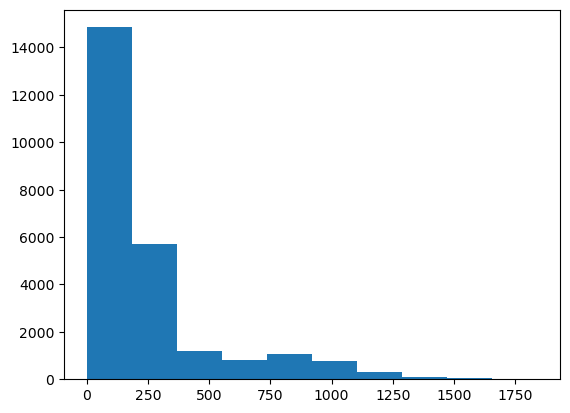

In [6]:
import matplotlib.pyplot as plt
plt.hist(list_h)

h_category = []
heigt_c = [100,300,600,900,1900]

for i in list_h:
    for j,k in enumerate(heigt_c):
        if i <k:
            h_category.append(j)
            break
df_comb['height_category'] = h_category

n_category = []
north_c = [6449347 +1*(2318191/5),6449347 +2*(2318191/5),6449347 +3*(2318191/5),6449347 +4*(2318191/5),6449347+10 +5*(2318191/5)]

for i in list_n:
    for j,k in enumerate(north_c):
        a = True
        if i <k:
            n_category.append(j)
            a=False
            break
    if a:
        print(i)

df_comb['north_category'] = n_category

df_comb.columns

In [7]:

ids = df_comb['Id']
landscape = pd.get_dummies(df_comb['landscape'],drop_first =True)
treeline  = pd.get_dummies(df_comb['treeline'],drop_first =True)
arskogbon = pd.get_dummies(df_comb['arskogbon'],drop_first =True)
artreslag = pd.get_dummies(df_comb['artreslag'],drop_first =True)
   

arjordbr = pd.get_dummies(df_comb['arjordbr'],drop_first =True)
arveget  = pd.get_dummies(df_comb['arveget'],drop_first =True)
Fylke = pd.get_dummies(df_comb['Fylke'],drop_first =True)
north_category = pd.get_dummies(df_comb['north_category'],drop_first =True)
height_category = pd.get_dummies(df_comb['height_category'],drop_first =True)
landscape_subtype = pd.get_dummies(df_comb['landscape_subtype'],drop_first=True)

df = pd.concat([ids,landscape,treeline,arskogbon,artreslag,arjordbr,arveget,Fylke,landscape_subtype,height_category,north_category],axis=1)

In [39]:
sns.heatmap(df_comb[['Nordkoordinat']].isnull())

NameError: name 'sns' is not defined

In [8]:
labels = df_comb['target']
id_label = pd.DataFrame({'Id':ids,'labels':labels})


In [9]:
id_list_train = train_dat['Id'].to_list()
id_list_test = test_dat['Id'].to_list()

df_train = df[df['Id'].isin(id_list_train)].loc[:, df.columns != 'Id']
df_test = df[df['Id'].isin(id_list_test)].loc[:, df.columns != 'Id']

labels_train = id_label[id_label['Id'].isin(id_list_train)].loc[:, id_label.columns != 'Id']
labels_test= id_label[id_label['Id'].isin(id_list_test)].loc[:, id_label.columns != 'Id']

,labels
0,86
1,60
2,89
3,15
4,91
...,...
4838,92
4839,96
4840,49
4841,57


In [13]:
import sklearn
df = df.apply(pd.to_numeric)
labels = labels.apply(pd.to_numeric)


x_train, x_test,y_train,y_test = sklearn.model_selection.train_test_split(df,labels,test_size=0.3,random_state=1)

In [14]:
df_train.columns = df_train.columns.astype(str)
df_test.columns = df_test.columns.astype(str)
# x_test.columns = x_test.columns.astype(str)

# df.columns = df.columns.astype(str)
labels_train

,labels
0,27
1,37
2,36
3,91
4,91
...,...
4014,64
4022,56
4031,81
4166,17


In [15]:
logmodel = LogisticRegression(class_weight = 'balanced')
logmodel.fit(df_train,labels_train)
import pickle



filename = 'multinomial_logisticmodel1.sav'

pickle.dump(logmodel, open(filename, 'wb'))

C:\Users\vjosv\anaconda3\envs\cuda_env\Lib\site-packages\sklearn\utils\validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\vjosv\anaconda3\envs\cuda_env\Lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [53]:
df
id_label

,Id,labels
0,32990095,61
1,28431995,28
2,11595183,21
3,27962698,1
4,29860528,57
...,...,...
15995,24840669,77
15996,24842728,78
15997,24843288,80
15998,24843702,14


In [60]:
id_label

,Id,labels
0,32990095,61
1,28431995,28
2,11595183,21
3,27962698,1
4,29860528,57
...,...,...
15995,24840669,77
15996,24842728,78
15997,24843288,80
15998,24843702,14


In [17]:
df0 =df.loc[:, df.columns != 'Id']
id_labels0= id_label[['labels']]


df0.columns = df0.columns.astype(str)
logmodel = LogisticRegression(class_weight = 'balanced')
logmodel.fit(df0,id_labels0)
import pickle


# df_test.columns = df_test.columns.astype(str)

# df
# id_label
filename = 'multinomial_logisticmodel1_validate.sav'

pickle.dump(logmodel, open(filename, 'wb'))

C:\Users\vjosv\anaconda3\envs\cuda_env\Lib\site-packages\sklearn\utils\validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\vjosv\anaconda3\envs\cuda_env\Lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [47]:
list_l = df_test.shape[0]
# logmodel
# precision_ = sklearn.metrics.precision_score(y_pred__t,labels_train,average=None)
precision_
above_10_list

NameError: name 'precision_' is not defined

In [48]:

# df_test.iloc[i:i+1]
i
list_l
print(above_10_list)

NameError: name 'above_10_list' is not defined

In [49]:
# label
y_pred__t = logmodel.predict(df_train)
precision_ = sklearn.metrics.precision_score(y_pred__t,labels_train,average=None)
above_10_list = []
for i,j in enumerate(precision_):
    if j>=0.10:
        above_10_list.append(i)

count_above_50 = 0
count_above_below_50 = 0
above_ = []
below_ = []
above_10 = []
below_10 = []
top_percent = []
for p in range(10, 100, 10):
    count_in_list = 0
    count_above_50 = 0
    count_above_below_50 = 0
    count_above_50_2 = 0
    count_above_below_50_2 = 0
    for i in range(list_l):
        y_pred_ = logmodel.predict_proba(df_test.iloc[i:i+1])



        y_pred0 = logmodel.predict(df_test.iloc[i:i+1])


        null_val = np.argsort(y_pred_)[0][-(100-p):]
        l_t = labels_test.iloc[i:i+1]
        if int(l_t.iloc[0].iloc[0]) in null_val:# and y_pred0[0] in above_10_precent:
            count_above_50+=1
        # elif y_pred0[0] in above_10_precent:
        else:
            count_above_below_50+=1
            
        if int(l_t.iloc[0].iloc[0]) in above_10_list:
            count_in_list+=1
        if int(l_t.iloc[0].iloc[0]) in null_val and int(l_t.iloc[0].iloc[0]) in above_10_list:
            count_above_50_2+=1
        elif int(l_t.iloc[0].iloc[0]) not in null_val and int(l_t.iloc[0].iloc[0]) in above_10_list:
            count_above_below_50_2+=1
    
    # print(count_in_list)
    top_percent.append(100-p)
    above_10.append((round((count_above_50_2/count_in_list)*100,3)))
    below_10.append((round((count_above_below_50_2/count_in_list)*100,3)))
    above_.append(round((count_above_50/list_l)*100,3))
    below_.append(round((count_above_below_50/list_l)*100,3))
    print(f'percentage above {(100-p)}: ',count_above_50/list_l)
    print(f'percentage below {(100-p)}: ',count_above_below_50/list_l)
    print(f'percentage 10 above {(100-p)}: ',count_above_50_2/count_in_list)
    print(f'percentage 10 below {(100-p)}: ',count_above_below_50_2/count_in_list)
    print(count_above_50_2/count_in_list+count_above_below_50_2/count_in_list)

percentage above 90:  0.99575
percentage below 90:  0.00425
percentage 10 above 90:  0.9926253687315634
percentage 10 below 90:  0.007374631268436578
1.0
percentage above 80:  0.98
percentage below 80:  0.02
percentage 10 above 80:  0.971976401179941
percentage 10 below 80:  0.028023598820058997
1.0
percentage above 70:  0.95175
percentage below 70:  0.04825
percentage 10 above 70:  0.9478859390363815
percentage 10 below 70:  0.05211406096361849
1.0
percentage above 60:  0.9115
percentage below 60:  0.0885
percentage 10 above 60:  0.9139626352015733
percentage 10 below 60:  0.08603736479842675
1.0
percentage above 50:  0.854
percentage below 50:  0.146
percentage 10 above 50:  0.872173058013766
percentage 10 below 50:  0.127826941986234
1.0
percentage above 40:  0.77875
percentage below 40:  0.22125
percentage 10 above 40:  0.8269419862340216
percentage 10 below 40:  0.17305801376597837
1.0
percentage above 30:  0.69025
percentage below 30:  0.30975
percentage 10 above 30:  0.769419862

In [ ]:
d = {}

percent = [100-p for p in range(10, 100, 10)]
percent

    # above_10.append((round((count_above_50_2/count_in_list)*100,3)))
    # below_10.append((round((count_above_below_50_2/count_in_list)*100,3)))
    # above_.append(round((count_above_50/list_l)*100,3))
    # below_.append(round((count_above_below_50/list_l)*100,3)
d['Top'] = percent
d['percentage in Top'] = above_
d['10 in Top'] = above_10      


d_ = pd.DataFrame(d)

d_ = d_.set_index('Top')

print(d_.to_latex())

In [50]:
i=0
y_pred_ = logmodel.predict_proba(df_test.iloc[i:i+1])



y_pred0 = logmodel.predict(df_test.iloc[i:i+1])

print(y_pred0)

null_val = np.argsort(y_pred_)[-1:]
print(null_val)

# null_val = np.argsort(y_pred_)[0][-1:]
# list(null_val)
if y_pred0[0] in list(null_val):
    print(y_pred0)

[58]
[[79 30 81 46 55 78 24 73  8 41  6 14 66 26 80 10 77 52 31 57 74 68 75 25
   1 63 56 49 64 97 54 86 53 13 21 85  5  3 42 16 23 93 96 62 71 45 72  9
  50 84 34  0 15 28 32 37 29 67 19 76 99 11 35 65 12 91 87  7 17 40 47 38
  36 18 95 48  4 22 70 92 61 89 94 98 60 90 51 33 43 69 39 27 83 59 44 88
   2 20 82 58]]


ValueError: The truth value of an array with more than one element is ambiguous. Use a.any() or a.all()

In [69]:
y_pred__t = logmodel.predict(df_test)
print(sklearn.metrics.classification_report(y_pred__t,labels_test))

              precision    recall  f1-score   support

           0       0.32      0.20      0.25       311
           1       0.10      0.10      0.10       199
           2       0.01      0.09      0.03        35
           3       0.12      0.11      0.11       215
           4       0.14      0.12      0.13       225
           5       0.00      0.00      0.00         3
           6       0.21      0.15      0.18       287
           7       0.09      0.09      0.09       188
           8       0.20      0.10      0.13       416
           9       0.50      0.22      0.30       457
          10       0.17      0.20      0.18       164
          11       0.15      0.10      0.12       326
          12       0.19      0.22      0.21       169
          13       0.23      0.15      0.19       308
          14       0.17      0.17      0.17       206
          15       0.07      0.17      0.10        82
          16       0.01      0.03      0.01        30
          17       0.02    

In [ ]:
# above_10_precent = 


In [ ]:
y_pred_ = logmodel.predict(df_test)

print(sklearn.metrics.classification_report(y_pred_,labels_test))

In [ ]:
y_test[0:5]

df_a = pd.concat([df_train,labels_train],axis=1)
df_a

In [ ]:
y_pred = logmodel.predict(df_test)

a = sklearn.metrics.classification_report(labels_test,y_pred)

sklearn.metrics.accuracy_score(labels_test,y_pred)

above_10_precent = [0,1,3,4,7,9,10,11,12,17,19,23,24,26,27,29,30,35,40,41,46,48,50,52,53,55,58,61,62,63,67,71,72,73,74,75,87,91,96]

## Adding observed in area around point

In [2]:
# dat = pd.read_csv('C:/Users/vjosv/master/dataset/images/csv/combined_lokasjon_top_100_images200_seed1117_attempt2_landscape_kde.csv')
dat = pd.read_csv('C:/Users/vjosv/master/dataset/images/csv/combined_lokasjon_top_100_images20_see1207_validation.csv')

dat = pd.read_csv('C:/Users/vjosv/master/dataset/images/csv/combined_lokasjon_top_100_images20_see1212_validation.csv')

test_dat = pd.read_csv('C:/Users/vjosv/master/dataset/images/csv/combined_lokasjon_top_100_images200_seed1117_attempt2_landscape_kde_test.csv')
test_dat.columns
train_dat =  pd.read_csv('C:/Users/vjosv/master/dataset/images/csv/combined_lokasjon_top_100_images200_seed1117_attempt2_landscape_kde_train.csv')
test_dat_path = 'C:/Users/vjosv/master/dataset/images/csv/combined_lokasjon_top_100_images200_seed1117_attempt2_landscape_kde_test.csv'

dat = test_dat

In [3]:
dat_loc = pd.read_csv('C:/Users/vjosv/master/dataset/images/csv/second_try_lokasjon_top_100_csv.csv')

C:\Users\vjosv\AppData\Local\Temp\ipykernel_41020\947455432.py:1: DtypeWarning: Columns (13,14,23,24,25,36,37,38,39,45) have mixed types. Specify dtype option on import or set low_memory=False.
  dat_loc = pd.read_csv('C:/Users/vjosv/master/dataset/images/csv/second_try_lokasjon_top_100_csv.csv')


In [5]:
dat.columns

dat_loc = dat_loc[~dat_loc['Id'].isin(dat['Id'].to_list())]
dat_loc

,Unnamed: 0.1,Unnamed: 0,Id,Taksonsorteringsrekkefølge,Valideringsstatus,Rødlistekategori,Artsnavn,Vitenskapelig navn,Autor,Antall,...,squares_40,squares_50,squares_60,squares_70,squares_80,squares_90,squares_100,squares_150,squares_200,squares_8
0,0,0,29974569,2276000,Ikke validert (funnet er ikke kvalitetssikret),NaN,rødkløver,Trifolium pratense,L.,-,...,"[8, 2]","[10, 2]","[12, 2]","[14, 3]","[16, 3]","[18, 3]","[20, 4]","[20, 4]","[20, 4]","[2, 1]"
1,1,1,29974564,2815000,Ikke validert (funnet er ikke kvalitetssikret),NaN,revebjelle,Digitalis purpurea,L.,-,...,"[8, 2]","[10, 2]","[12, 2]","[14, 3]","[16, 3]","[18, 3]","[20, 4]","[20, 4]","[20, 4]","[2, 1]"
2,2,2,29974562,170000,Ikke validert (funnet er ikke kvalitetssikret),NaN,ryllik,Achillea millefolium,L.,-,...,"[8, 2]","[10, 2]","[12, 2]","[14, 3]","[16, 3]","[18, 3]","[20, 4]","[20, 4]","[20, 4]","[2, 1]"
3,3,3,29974553,321000,Ikke validert (funnet er ikke kvalitetssikret),NaN,veitistel,Cirsium vulgare,(Savi) Ten.,-,...,"[8, 2]","[10, 2]","[12, 2]","[14, 3]","[16, 3]","[18, 3]","[20, 4]","[20, 4]","[20, 4]","[2, 1]"
4,4,4,29974552,3251000,Ikke validert (funnet er ikke kvalitetssikret),NaN,geitrams,Chamaenerion angustifolium,(L.) Scop.,-,...,"[8, 2]","[10, 2]","[12, 2]","[14, 3]","[16, 3]","[18, 3]","[20, 4]","[20, 4]","[20, 4]","[2, 1]"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
828437,828437,844598,23096403,1917000,Ikke validert (funnet er ikke kvalitetssikret),SE,kjempespringfrø,Impatiens glandulifera,Royle,-,...,"[20, 13]","[25, 16]","[30, 19]","[35, 23]","[40, 26]","[45, 29]","[50, 32]","[50, 32]","[50, 32]","[4, 3]"
828438,828438,844599,12055731,3476000,Ikke validert (funnet er ikke kvalitetssikret),NaN,bekkeblom,Caltha palustris,L.,-,...,"[8, 11]","[10, 13]","[12, 16]","[14, 18]","[16, 21]","[18, 24]","[19, 26]","[19, 26]","[19, 26]","[2, 2]"
828439,828439,844600,11722956,2006000,Ikke validert (funnet er ikke kvalitetssikret),NaN,tyttebær,Vaccinium vitis-idaea,L.,-,...,"[21, 11]","[26, 13]","[32, 16]","[37, 19]","[42, 21]","[48, 24]","[53, 27]","[53, 27]","[53, 27]","[4, 2]"
828440,828440,844601,11969669,3514000,Ikke validert (funnet er ikke kvalitetssikret),NaN,blåveis,Hepatica nobilis,Schreb.,-,...,"[2, 8]","[2, 10]","[3, 11]","[3, 13]","[4, 15]","[4, 17]","[4, 19]","[4, 19]","[4, 19]","[1, 2]"


In [6]:
# dat_loc = dat_loc[~dat_loc['Id'].isin(dat['Id'].to_list())]

# dat_loc = dat_loc[~dat_loc['Id'].isin(dat['Id'].to_list())]
dat_loc.columns
# dat_loc = dat_loc.drop(columns=['Unnamed: 0.4', 'Unnamed: 0.3', 'Unnamed: 0.2', 'Unnamed: 0.1',
       # 'Unnamed: 0'])
# dat_loc.columns
# dat_loc.to_csv('C:/Users/vjosv/master/dataset/images/csv/second_try_lokasjon_top_100_csv.csv')

Index(['Unnamed: 0.1', 'Unnamed: 0', 'Id', 'Taksonsorteringsrekkefølge',
       'Valideringsstatus', 'Rødlistekategori', 'Artsnavn',
       'Vitenskapelig navn', 'Autor', 'Antall', 'Enhet', 'Alder', 'Kjønn',
       'Aktivitet', 'Metode', 'Superlokalitet', 'Lokalitetsnavn',
       'Østkoordinat', 'Nordkoordinat', 'Nøyaktighet', 'Originale koordinater',
       'Fylke', 'Kommune', 'Fylke.1', 'IKKE I NORGE', 'Ekstern id',
       'Startdato', 'Stattidspunkt', 'Sluttdato', 'Sluttidspunkt', 'Kommentar',
       'Ikke gjenfunnet', 'Usikker artsbestemmelse', 'Uspontan', 'Natursystem',
       'Natursystem beskrivelse', 'Livsmedium', 'Vitenskapelig livsmediumnavn',
       'Art som livsmedium, beskrivelse', 'Livsmedium.1',
       'Livsmediumbeskrivelse', 'Min. dybde', 'Maks. dybde', 'Høyde min',
       'Høyde maks', 'Offentlig samling', 'Privat samling', 'Bekreftelsesdato',
       'Redigeringsansvarlig', 'Rapportør', 'Observatører', 'science_name',
       'target', 'height', 'points', 'square_20x20

In [7]:


points = dat_loc[['Østkoordinat','Nordkoordinat']].to_numpy()

point_tree = spatial.cKDTree(points)


def get_points_within(df_row, distance=1000):
    id = int(df_row['Id'])
    return_list = point_tree.query_ball_point([[int(df_row['Østkoordinat']),int(df_row['Nordkoordinat'])]], distance)[0]
    # print(return_list)
    return_dat = dat_loc.iloc[return_list]
    # return_list = list(return_dat['Id'])
    # return_list.remove(id)
    return return_dat

In [8]:
a = get_points_within(dat_loc.iloc[2])

In [9]:
dat_points = dat[['Østkoordinat','Nordkoordinat']].to_numpy()




In [10]:
in_100=[]
in_200=[]
in_500=[]
in_1000=[]
in_1500=[]
for i in tqdm(range(dat.shape[0])):
    # print(dat.iloc[i])
    points_in_area = get_points_within(dat.iloc[i],distance = 100)
    
    p_i_a_l = list(points_in_area['target'])
    z = np.zeros(100)
    z[p_i_a_l] = 1
    in_100.append(list(z))
dat['in_100']=in_100

for i in tqdm(range(dat.shape[0])):
    # print(dat.iloc[i])
    points_in_area = get_points_within(dat.iloc[i],distance = 200)
    
    p_i_a_l = list(points_in_area['target'])
    z = np.zeros(100)
    z[p_i_a_l] = 1
    in_200.append(list(z))
dat['in_200']=in_200

for i in tqdm(range(dat.shape[0])):
    # print(dat.iloc[i])
    points_in_area = get_points_within(dat.iloc[i],distance = 500)
    
    p_i_a_l = list(points_in_area['target'])
    z = np.zeros(100)
    z[p_i_a_l] = 1
    in_500.append(list(z))
dat['in_500']=in_500


for i in tqdm(range(dat.shape[0])):
    # print(dat.iloc[i])
    points_in_area = get_points_within(dat.iloc[i],distance = 1000)
    
    p_i_a_l = list(points_in_area['target'])
    z = np.zeros(100)
    z[p_i_a_l] = 1
    in_1000.append(list(z))
dat['in_1000']=in_1000


for i in tqdm(range(dat.shape[0])):
    # print(dat.iloc[i])
    points_in_area = get_points_within(dat.iloc[i],distance = 1500)
    
    p_i_a_l = list(points_in_area['target'])
    z = np.zeros(100)
    z[p_i_a_l] = 1
    in_1500.append(list(z))
dat['in_1500']=in_1500

100%|██████████| 4000/4000 [00:02<00:00, 1540.63it/s]


In [11]:
# dat.to_csv('C:/Users/vjosv/master/dataset/images/csv/combined_lokasjon_top_100_images200_seed1117_attempt2_landscape_kde.csv')
# dat.to_csv('C:/Users/vjosv/master/dataset/images/csv/combined_lokasjon_top_100_images20_see1207_validation.csv')
# dat.to_csv('C:/Users/vjosv/master/dataset/images/csv/combined_lokasjon_top_100_images20_see1212_validation.csv')
dat.to_csv('C:/Users/vjosv/master/dataset/images/csv/combined_lokasjon_top_100_images200_seed1117_attempt2_landscape_kde_test.csv')

In [115]:
dat

,Unnamed: 0.2,Id,Taksonsorteringsrekkefølge,Valideringsstatus,Rødlistekategori,Artsnavn,Vitenskapelig navn,Autor,Antall,Enhet,...,artreslag,arjordbr,arveget,arkartstd,kilde,in_100,in_200,in_500,in_1000,in_1500
0,7523,32282729,3243000,Ikke validert (funnet er ikke kvalitetssikret),NaN,tysbast,Daphne mezereum,L.,-,,...,31.0,98.0,98.0,AR50,AR50 fra AR5 årsversjon 2021. ARFJELL2 og N50 ...,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[0.0, 0.0, 0.0, 1.0, 1.0, 0.0, 0.0, 1.0, 0.0, ...","[1.0, 1.0, 1.0, 1.0, 1.0, 0.0, 0.0, 1.0, 0.0, ...","[1.0, 1.0, 1.0, 1.0, 1.0, 0.0, 0.0, 1.0, 0.0, ..."
1,15004,29570427,2511000,Ikke validert (funnet er ikke kvalitetssikret),NaN,stankstorkenebb,Geranium robertianum,L.,4,Planter,...,39.0,98.0,99.0,AR50,AR50 fra AR5 årsversjon 2021. ARFJELL2 og N50 ...,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, ...","[0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 1.0, 0.0, 0.0, ...","[0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 1.0, 0.0, 0.0, ...","[0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 1.0, 0.0, 0.0, ...","[0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 1.0, 0.0, 0.0, ..."
2,7261,11366796,4745000,Ikke validert (funnet er ikke kvalitetssikret),NaN,gullstjerne,Gagea lutea,(L.) Ker Gawl.,3,Planter,...,32.0,98.0,98.0,AR50,AR50 fra AR5 årsversjon 2021. ARFJELL2 og N50 ...,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, ...","[1.0, 1.0, 1.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, ...","[1.0, 1.0, 1.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, ...","[1.0, 1.0, 1.0, 0.0, 1.0, 0.0, 0.0, 1.0, 0.0, ...","[1.0, 1.0, 1.0, 1.0, 1.0, 0.0, 0.0, 1.0, 0.0, ..."
3,12843,29971161,2007000,Ikke validert (funnet er ikke kvalitetssikret),NaN,blåbær,Vaccinium myrtillus,L.,-,,...,31.0,98.0,98.0,AR50,AR50 fra AR5 årsversjon 2021. ARFJELL2 og N50 ...,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, ...","[0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 1.0, 0.0, ...","[1.0, 0.0, 1.0, 0.0, 1.0, 0.0, 0.0, 1.0, 0.0, ..."
4,12845,29971014,2007000,Ikke validert (funnet er ikke kvalitetssikret),NaN,blåbær,Vaccinium myrtillus,L.,-,,...,31.0,98.0,98.0,AR50,AR50 fra AR5 årsversjon 2021. ARFJELL2 og N50 ...,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, ...","[0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 1.0, 0.0, ...","[1.0, 0.0, 1.0, 0.0, 1.0, 0.0, 0.0, 1.0, 0.0, ..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19995,7496,11326742,4667000,Ikke validert (funnet er ikke kvalitetssikret),NaN,skogmarihand,Dactylorhiza maculata fuchsii,(Druce) Hyl.,-,NaN,...,98.0,24.0,98.0,AR50,AR50 fra AR5 årsversjon 2021. ARFJELL2 og N50 ...,"[1.0, 0.0, 1.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, ...","[1.0, 0.0, 1.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, ...","[1.0, 0.0, 1.0, 0.0, 1.0, 1.0, 0.0, 1.0, 0.0, ...","[1.0, 0.0, 1.0, 1.0, 1.0, 1.0, 0.0, 1.0, 0.0, ...","[1.0, 0.0, 1.0, 1.0, 1.0, 1.0, 0.0, 1.0, 0.0, ..."
19996,7495,11326983,4745000,Ikke validert (funnet er ikke kvalitetssikret),NaN,gullstjerne,Gagea lutea,(L.) Ker Gawl.,-,NaN,...,98.0,98.0,98.0,AR50,AR50 fra AR5 årsversjon 2021. ARFJELL2 og N50 ...,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, ...","[0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 1.0, 0.0, ...","[1.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 1.0, 0.0, ...","[1.0, 0.0, 1.0, 0.0, 1.0, 1.0, 0.0, 1.0, 0.0, ..."
19997,7494,11326984,4745000,Ikke validert (funnet er ikke kvalitetssikret),NaN,gullstjerne,Gagea lutea,(L.) Ker Gawl.,-,NaN,...,33.0,98.0,98.0,AR50,AR50 fra AR5 årsversjon 2021. ARFJELL2 og N50 ...,"[0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 1.0, 0.0, ...","[0.0, 0.0, 0.0, 1.0, 1.0, 0.0, 0.0, 1.0, 0.0, ...","[0.0, 0.0, 0.0, 1.0, 1.0, 0.0, 0.0, 1.0, 0.0, ...","[1.0, 0.0, 1.0, 1.0, 1.0, 0.0, 0.0, 1.0, 0.0, ...","[1.0, 0.0, 1.0, 1.0, 1.0, 0.0, 0.0, 1.0, 0.0, ..."
19998,7493,11326985,4745000,Ikke validert (funnet er ikke kvalitetss